# Information on How These Data Are Organized:

`TypeOfResponse` refers to whether participants pressed a button ("SCTResp") or did not press a button ("SCTRespITI") within the given time frame.

`Version` refers to the task version. I never changed the JS code; I merely changed which face/house was labeled as S1_1, S1_2, S1_3, or S1_4 in respective task folders.

`LogCounter` gets added to whenever the JS records a new datapoint.

`TrialCounter` gets added to whenever a new trial has started. This is reset at the start of each block.

`MatrixCounter` gets added to throughout the task and is never reset. It is what I use to call Stimuli #s.

`RunCounter` refers to the run: 0 is run 1, 1 is run 2.

`CongruentCounter` marks any time a congruent trial occurred; `IncongruentCounter` an incongruent trial.

`StimPresented` refers to which face or house was presented before the trial. This is in reference to the main manipulation of the S-CT test phase: we examine whether congruency effects are modulated through previously learned associations with the S2 control-demand cues.

`StimProbAll` refers to my matrix of possible trial types. So it indicates whether "RED" will be shown in red, etc.

`TrialType` also marks incongruent/congruent trials.

`StroopNum` refers to the Stroop Stimuli: 1 is BLUE in BLUE; 2 RED in RED; 3 GREEN in GREEN; 4 YELLOW in YELLOW; 6 BLUE in YELLOW; 10 RED in GREEN; 12 YELLOW in BLUE; 14 GREEN in RED. Now in the transfer phase, if the subjects learned stimulus-response contingencies, you'd expect transfer for the previously frequency-biased stimuli, but not the frequency-unbiased stimuli. If control states transferred, you'd expect it for the previously frequency-unbiased stimuli, but not the frequency-biased stimuli.

`PressCorrect` refers to the button that participants should press on that trial. This is how I define accuracy (i.e., correct: when PressCorrect = actualkeyPressed).

`ResponseMatrix` refers to which key is pressed; this is a redundant variable and was used to make sure that each key had been required an equal number of times throughout the task.

`ActualKeyPressed` is what key subjects pressed.

`Accuracy` & `RT` self-explanatory.

`FeedbackType` refers to whether they got correct as fb, incorrect as fb, or the fb time-out.

`runStart` refers to the initiation of the countdown to begin the task.

`ImagePresent` refers to when scene was presented.

`StimTime` refers to when the color word was presented.

`ColorTime` refers to when the color of the color word was presented.

`RespOnset` refers to when a response was made.

`AccCount` is how I give subjects accurate fb of their performance at the end of each run (i.e., a counter that gets added to after each correct trial & is divided by trial #).

`Subject` self-explanatory.

Some other labels aren't coded in the JS: `Sequential` refers to whether a trial was the same (0) as before, changed to incongruent or congruent on the next trial, etc., and `StimRep` looks for direct repetitions in the StimProbAll matrix. These were coded in Matlab and added to the CSV file.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as plb
import math
from scipy import stats

%matplotlib notebook 

In [2]:
%cd C:\Users\cb383\Desktop\YearTwo\controlwork\SCP_R\data
dat = pd.read_csv('AllSubsSCT.csv')

C:\Users\cb383\Desktop\YearTwo\controlwork\SCP_R\data


# Do some basic cleaning

#### We are filtering and preparing the data for analysis.

FOR REACTION TIMES:

-Select only `TypeOfResponse` equal to `Resp` (`ITI Resp` is when subs didn't respond).

-Only take the RTs that are greater than 200ms and less than 800 ms (b/c 200 ms, the color-word is black).

-Only take the RTs on accurate trials.

-Only take trials where the stimulus didn't repeat.


FOR ACCURACY:

-All errors are errors

In [3]:
cdat = dat.query('(TypeOfResponse != "SCTRespITI") & (RT > 200) & (RT < 800) & (Accuracy != 0) & (StimRep != 1)').copy()
adat = dat.copy()

#### Now I'm making columns in the data based off my variables so that analysis will be easier.

In [4]:
adat['TransferProbe'] = adat['StimPresented'].isin([1, 2])
adat.loc[adat['StimPresented'].isin([1, 2]), 'TransferProbe'] = 'High'
adat.loc[~adat['StimPresented'].isin([1, 2]), 'TransferProbe'] = 'Low'

adat['Congruency'] = adat['TrialType'].isin([1])
adat.loc[adat['TrialType'].isin([1]),'Congruency'] = 'Incongruent'
adat.loc[~adat['TrialType'].isin([1]),'Congruency'] = 'Congruent'

adat['FreqBias'] = adat['StroopNumber'].isin([1])
adat.loc[adat['StroopNumber'].isin([2,3,10,14]),'FreqBias'] = 'FreqBiased'
adat.loc[adat['StroopNumber'].isin([1,4,6,12]),'FreqBias'] = 'FreqUnbiased'

cdat['TransferProbe'] = cdat['StimPresented'].isin([1, 2])
cdat.loc[cdat['StimPresented'].isin([1, 2]), 'TransferProbe'] = 'High'
cdat.loc[~cdat['StimPresented'].isin([1, 2]), 'TransferProbe'] = 'Low'

cdat['Congruency'] = cdat['TrialType'].isin([1])
cdat.loc[cdat['TrialType'].isin([1]),'Congruency'] = 'Incongruent'
cdat.loc[~cdat['TrialType'].isin([1]),'Congruency'] = 'Congruent'

cdat['FreqBias'] = cdat['StroopNumber'].isin([1])
cdat.loc[cdat['StroopNumber'].isin([2,3,10,14]),'FreqBias'] = 'FreqBiased'
cdat.loc[cdat['StroopNumber'].isin([1,4,6,12]),'FreqBias'] = 'FreqUnbiased'

In [5]:
adat['ContextCong'] = adat['TransferProbe'].isin(['High']) & adat['TrialType'].isin([1])
adat.loc[(adat['TransferProbe'].isin(['High']) & adat['TrialType'].isin([1])), 'ContextCong'] = 'HighIC'
adat.loc[(adat['TransferProbe'].isin(['Low']) & adat['TrialType'].isin([1])), 'ContextCong'] = 'LowIC'
adat.loc[(adat['TransferProbe'].isin(['High']) & adat['TrialType'].isin([2])), 'ContextCong'] = 'HighC'
adat.loc[(adat['TransferProbe'].isin(['Low']) & adat['TrialType'].isin([2])), 'ContextCong'] = 'LowC'

cdat['ContextCong'] = cdat['TransferProbe'].isin(['High']) & cdat['TrialType'].isin([1])
cdat.loc[(cdat['TransferProbe'].isin(['High']) & cdat['TrialType'].isin([1])), 'ContextCong'] = 'HighIC'
cdat.loc[(cdat['TransferProbe'].isin(['Low']) & cdat['TrialType'].isin([1])), 'ContextCong'] = 'LowIC'
cdat.loc[(cdat['TransferProbe'].isin(['High']) & cdat['TrialType'].isin([2])), 'ContextCong'] = 'HighC'
cdat.loc[(cdat['TransferProbe'].isin(['Low']) & cdat['TrialType'].isin([2])), 'ContextCong'] = 'LowC'

# Look at Mean Cueing Effects

### For the frequency-unbiased stimuli, we are hoping to see an interaction between transfer probe and congruency, such that people use the cues to modulate Stroop congruency at first (run 1) but then realize that these cues are not actually useful (run 2). Namely, we would predict that people would have a smaller difference between the Stroop trial types for the "high" compared to "low" transfer probe (for frequency-unbiased stimuli). This would result from learning to associate a state of higher attentional focus with the high transfer probe via its associated control-demand cue, which in turn means more efficient processing - or responding quicker to incongruent trials and potentially slower to congruent trials. This effect should dissipate after run 1 because these probes are non-predictive.

### We should not observe transfer for the frequency biased stimuli. If we do, that'd possibly suggest some mixture of S-C and S-R learning transferring (assuming we observed transfer for the freq-unbiased stim, too; if there was no transfer for freq-unbiased stim, but only transfer for freq-biased stim, that'd suggest some kind of S-R contigency transfer learning).

In [6]:
sub_RTmeans = cdat.loc[cdat['FreqBias'] == 'FreqUnbiased'].groupby(['subject','ContextCong'])['RT'].mean()
RTgrpmean = pd.Series.mean(sub_RTmeans,level=1)
RTgrpmean

ContextCong
HighC     480.038841
HighIC    557.847804
LowC      477.040698
LowIC     557.774070
Name: RT, dtype: float64

In [7]:
RTgrpstd = pd.Series.std(sub_RTmeans,level=1)
RTgrpstd

ContextCong
HighC     42.728038
HighIC    31.266994
LowC      40.025872
LowIC     39.414989
Name: RT, dtype: float64

In [8]:
n = math.sqrt(44)
RTstderror = RTgrpstd / n
RTstderror

ContextCong
HighC     6.441494
HighIC    4.713677
LowC      6.034127
LowIC     5.942033
Name: RT, dtype: float64

#### Judging by these initial numbers, we are unlikely to find an interaction between cue & congruency, at least when looking at both runs together. Is that true of Accuracy?

In [9]:
sub_ACCmeans = adat.loc[adat['FreqBias'] == 'FreqUnbiased'].groupby(['subject','ContextCong'])['Accuracy'].mean()
ACCgrpmean = pd.Series.mean(sub_ACCmeans,level=1)
ACCgrpmean

ContextCong
HighC     0.961364
HighIC    0.928289
LowC      0.957955
LowIC     0.930682
Name: Accuracy, dtype: float64

In [10]:
ACCgrpstd = pd.Series.std(sub_ACCmeans,level=1)
ACCgrpstd

ContextCong
HighC     0.054840
HighIC    0.080950
LowC      0.053855
LowIC     0.081566
Name: Accuracy, dtype: float64

In [11]:
ACCstderror = ACCgrpstd / n
ACCstderror

ContextCong
HighC     0.008267
HighIC    0.012204
LowC      0.008119
LowIC     0.012297
Name: Accuracy, dtype: float64

#### Okay, since transfer is expected to be run sensitive, what about only for Run 1 data?

In [12]:
sub_RTmeans_Run1 = cdat.loc[cdat['RunCounter'] < 1].loc[cdat['FreqBias'] == 'FreqUnbiased'].groupby(['subject','ContextCong'])['RT'].mean()
RTgrpmean_Run1 = pd.Series.mean(sub_RTmeans_Run1,level=1)
RTgrpmean_Run1

ContextCong
HighC     479.207062
HighIC    553.332729
LowC      475.132864
LowIC     562.460877
Name: RT, dtype: float64

In [13]:
RTgrpstd_Run1 = pd.Series.std(sub_RTmeans_Run1,level=1)
RTgrpstd_Run1

ContextCong
HighC     48.188327
HighIC    33.697833
LowC      47.183463
LowIC     45.366708
Name: RT, dtype: float64

In [14]:
n = math.sqrt(44)
RTstderror_Run1 = RTgrpstd_Run1 / n
RTstderror_Run1

ContextCong
HighC     7.264664
HighIC    5.080139
LowC      7.113175
LowIC     6.839289
Name: RT, dtype: float64

In [15]:
sub_RTmeans_Run1_B = cdat.loc[cdat['RunCounter'] < 1].loc[cdat['FreqBias'] == 'FreqBiased'].groupby(['subject','ContextCong'])['RT'].mean()
RTgrpmean_Run1_B = pd.Series.mean(sub_RTmeans_Run1_B,level=1)
RTgrpmean_Run1_B

ContextCong
HighC     516.561021
HighIC    581.799251
LowC      516.885011
LowIC     580.993479
Name: RT, dtype: float64

In [16]:
RTgrpstd_Run1_B = pd.Series.std(sub_RTmeans_Run1_B,level=1)
RTgrpstd_Run1_B

ContextCong
HighC     46.412415
HighIC    39.887069
LowC      43.615574
LowIC     43.659922
Name: RT, dtype: float64

In [17]:
n = math.sqrt(44)
RTstderror_Run1_B = RTgrpstd_Run1_B / n
RTstderror_Run1_B

ContextCong
HighC     6.996935
HighIC    6.013202
LowC      6.575295
LowIC     6.581981
Name: RT, dtype: float64

#### Looks like RT may show an interaction between our cue and congruency for run 1 but not run 2, and specifically only for frequency unbiased compared to biased stimuli. Accuracy?

In [18]:
sub_ACCmeans_Run1 = adat.loc[adat['RunCounter'] < 1].loc[adat['FreqBias'] == 'FreqUnbiased'].groupby(['subject','ContextCong'])['Accuracy'].mean()
ACCgrpmean_Run1 = pd.Series.mean(sub_ACCmeans_Run1,level=1)
ACCgrpmean_Run1

ContextCong
HighC     0.956818
HighIC    0.929545
LowC      0.965909
LowIC     0.945455
Name: Accuracy, dtype: float64

In [19]:
ACCgrpstd_Run1 = pd.Series.std(sub_ACCmeans_Run1,level=1)
ACCgrpstd_Run1

ContextCong
HighC     0.078940
HighIC    0.085125
LowC      0.056828
LowIC     0.084783
Name: Accuracy, dtype: float64

In [20]:
ACCstderror_Run1 = ACCgrpstd_Run1 / n
ACCstderror_Run1

ContextCong
HighC     0.011901
HighIC    0.012833
LowC      0.008567
LowIC     0.012782
Name: Accuracy, dtype: float64

In [21]:
sub_ACCmeans_Run1_B = adat.loc[adat['RunCounter'] < 1].loc[adat['FreqBias'] == 'FreqBiased'].groupby(['subject','ContextCong'])['Accuracy'].mean()
ACCgrpmean_Run1_B = pd.Series.mean(sub_ACCmeans_Run1_B,level=1)
ACCgrpmean_Run1_B

ContextCong
HighC     0.902273
HighIC    0.865909
LowC      0.886364
LowIC     0.838636
Name: Accuracy, dtype: float64

In [22]:
ACCgrpstd_Run1_B = pd.Series.std(sub_ACCmeans_Run1_B,level=1)
ACCgrpstd_Run1_B

ContextCong
HighC     0.110997
HighIC    0.144581
LowC      0.113283
LowIC     0.165959
Name: Accuracy, dtype: float64

In [23]:
ACCstderror_Run1_B = ACCgrpstd_Run1_B / n
ACCstderror_Run1_B

ContextCong
HighC     0.016733
HighIC    0.021796
LowC      0.017078
LowIC     0.025019
Name: Accuracy, dtype: float64

# Creating Variables to Run Statistics

#### This is a Python set of analyses, where the data above are organized in what's called "long-form" and to run statistics, I need "wide-form" data. So I am creating a new "dataframe" with the RT and accuracy means for congruent & incongruent trials, after presentation of the low & high control-demand cue, for each subject.

In [24]:
RTanalysis_Bias = pd.DataFrame()
bias_lists = [[] for list in range(0,7)]
FreqBiasStim = cdat[cdat.FreqBias =='FreqBiased'];

for ID in range(1,55):
    sub = FreqBiasStim[FreqBiasStim.subject == ID]
    bias_lists[0].append(ID)
    LowCRT_trials = sub[sub.ContextCong == 'LowC'].RT.mean()
    LowICRT_trials = sub[sub.ContextCong == 'LowIC'].RT.mean()
    HighCRT_trials = sub[sub.ContextCong == 'HighC'].RT.mean()
    HighICRT_trials = sub[sub.ContextCong == 'HighIC'].RT.mean()    
    bias_lists[1].append(LowCRT_trials)
    bias_lists[2].append(LowICRT_trials)
    bias_lists[3].append(HighCRT_trials)
    bias_lists[4].append(HighICRT_trials)
    
RTanalysis_Bias['SubjectID'] = bias_lists[0]
RTanalysis_Bias['LowC'] = bias_lists[1]
RTanalysis_Bias['LowIC'] = bias_lists[2]
RTanalysis_Bias['HighC'] = bias_lists[3]
RTanalysis_Bias['HighIC'] = bias_lists[4]

In [25]:
RTanalysis_unbias = pd.DataFrame()
unbias_lists = [[] for list in range(0,7)]
FreqUnBiasStim = cdat[cdat.FreqBias =='FreqUnbiased'];

for ID in range(1,55):
    sub = FreqUnBiasStim[FreqUnBiasStim.subject == ID]
    unbias_lists[0].append(ID)
    LowCRT_trials = sub[sub.ContextCong == 'LowC'].RT.mean()
    LowICRT_trials = sub[sub.ContextCong == 'LowIC'].RT.mean()
    HighCRT_trials = sub[sub.ContextCong == 'HighC'].RT.mean()
    HighICRT_trials = sub[sub.ContextCong == 'HighIC'].RT.mean()    
    unbias_lists[1].append(LowCRT_trials)
    unbias_lists[2].append(LowICRT_trials)
    unbias_lists[3].append(HighCRT_trials)
    unbias_lists[4].append(HighICRT_trials)
    
RTanalysis_unbias['SubjectID'] = unbias_lists[0]
RTanalysis_unbias['LowC'] = unbias_lists[1]
RTanalysis_unbias['LowIC'] = unbias_lists[2]
RTanalysis_unbias['HighC'] = unbias_lists[3]
RTanalysis_unbias['HighIC'] = unbias_lists[4]

In [26]:
Run1OnlyRT_bias = pd.DataFrame()
run1_biaslists = [[] for list in range(0,7)]
run1 = cdat[cdat.RunCounter < 1]
FreqBiasStim_R1 = run1[run1.FreqBias =='FreqBiased'];

for ID in range(1,55):
    sub = FreqBiasStim_R1[FreqBiasStim_R1.subject == ID]
    run1_biaslists[0].append(ID)
    LowCRT_trials = sub[sub.ContextCong == 'LowC'].RT.mean()
    LowICRT_trials = sub[sub.ContextCong == 'LowIC'].RT.mean()
    HighCRT_trials = sub[sub.ContextCong == 'HighC'].RT.mean()
    HighICRT_trials = sub[sub.ContextCong == 'HighIC'].RT.mean()    
    run1_biaslists[1].append(LowCRT_trials)
    run1_biaslists[2].append(LowICRT_trials)
    run1_biaslists[3].append(HighCRT_trials)
    run1_biaslists[4].append(HighICRT_trials)
    
Run1OnlyRT_bias['SubjectID'] = run1_biaslists[0]
Run1OnlyRT_bias['LowC'] = run1_biaslists[1]
Run1OnlyRT_bias['LowIC'] = run1_biaslists[2]
Run1OnlyRT_bias['HighC'] = run1_biaslists[3]
Run1OnlyRT_bias['HighIC'] = run1_biaslists[4]

In [27]:
Run1OnlyRT_unbias = pd.DataFrame()
run1_unbiaslists = [[] for list in range(0,7)]
run1 = cdat[cdat.RunCounter < 1]
FreqUnBiasStim_R1 = run1[run1.FreqBias =='FreqUnbiased'];

for ID in range(1,55):
    sub = FreqUnBiasStim_R1[FreqUnBiasStim_R1.subject == ID]
    run1_unbiaslists[0].append(ID)
    LowCRT_trials = sub[sub.ContextCong == 'LowC'].RT.mean()
    LowICRT_trials = sub[sub.ContextCong == 'LowIC'].RT.mean()
    HighCRT_trials = sub[sub.ContextCong == 'HighC'].RT.mean()
    HighICRT_trials = sub[sub.ContextCong == 'HighIC'].RT.mean()    
    run1_unbiaslists[1].append(LowCRT_trials)
    run1_unbiaslists[2].append(LowICRT_trials)
    run1_unbiaslists[3].append(HighCRT_trials)
    run1_unbiaslists[4].append(HighICRT_trials)
    
Run1OnlyRT_unbias['SubjectID'] = run1_unbiaslists[0]
Run1OnlyRT_unbias['LowC'] = run1_unbiaslists[1]
Run1OnlyRT_unbias['LowIC'] = run1_unbiaslists[2]
Run1OnlyRT_unbias['HighC'] = run1_unbiaslists[3]
Run1OnlyRT_unbias['HighIC'] = run1_unbiaslists[4]

In [28]:
ACCanalysis_Bias = pd.DataFrame()
bias_acclists = [[] for list in range(0,7)]
FreqBiasACCStim = adat[adat.FreqBias =='FreqBiased'];

for ID in range(1,55):
    sub = FreqBiasACCStim[FreqBiasACCStim.subject == ID]
    bias_acclists[0].append(ID)
    LowCACC_trials = sub[sub.ContextCong == 'LowC'].Accuracy.mean()
    LowICACC_trials = sub[sub.ContextCong == 'LowIC'].Accuracy.mean()
    HighCACC_trials = sub[sub.ContextCong == 'HighC'].Accuracy.mean()
    HighICACC_trials = sub[sub.ContextCong == 'HighIC'].Accuracy.mean()    
    bias_acclists[1].append(LowCACC_trials)
    bias_acclists[2].append(LowICACC_trials)
    bias_acclists[3].append(HighCACC_trials)
    bias_acclists[4].append(HighICACC_trials)
    
ACCanalysis_Bias['SubjectID'] = bias_acclists[0]
ACCanalysis_Bias['LowC'] = bias_acclists[1]
ACCanalysis_Bias['LowIC'] = bias_acclists[2]
ACCanalysis_Bias['HighC'] = bias_acclists[3]
ACCanalysis_Bias['HighIC'] = bias_acclists[4]

In [29]:
ACCanalysis_unbias = pd.DataFrame()
unbias_acclists = [[] for list in range(0,7)]
FreqUnBiasACCStim = adat[adat.FreqBias =='FreqUnbiased'];

for ID in range(1,55):
    sub = FreqUnBiasACCStim[FreqUnBiasACCStim.subject == ID]
    unbias_acclists[0].append(ID)
    LowCACC_trials = sub[sub.ContextCong == 'LowC'].Accuracy.mean()
    LowICACC_trials = sub[sub.ContextCong == 'LowIC'].Accuracy.mean()
    HighCACC_trials = sub[sub.ContextCong == 'HighC'].Accuracy.mean()
    HighICACC_trials = sub[sub.ContextCong == 'HighIC'].Accuracy.mean()    
    unbias_acclists[1].append(LowCACC_trials)
    unbias_acclists[2].append(LowICACC_trials)
    unbias_acclists[3].append(HighCACC_trials)
    unbias_acclists[4].append(HighICACC_trials)
    
ACCanalysis_unbias['SubjectID'] = unbias_acclists[0]
ACCanalysis_unbias['LowC'] = unbias_acclists[1]
ACCanalysis_unbias['LowIC'] = unbias_acclists[2]
ACCanalysis_unbias['HighC'] = unbias_acclists[3]
ACCanalysis_unbias['HighIC'] = unbias_acclists[4]

In [30]:
Run1OnlyACC_bias = pd.DataFrame()
run1_accbiaslists = [[] for list in range(0,7)]
run1acc = adat[adat.RunCounter < 1]
FreqBiasACCStim_R1 = run1acc[run1acc.FreqBias =='FreqBiased'];

for ID in range(1,55):
    sub = FreqBiasACCStim_R1[FreqBiasACCStim_R1.subject == ID]
    run1_accbiaslists[0].append(ID)
    LowCACC_trials = sub[sub.ContextCong == 'LowC'].Accuracy.mean()
    LowICACC_trials = sub[sub.ContextCong == 'LowIC'].Accuracy.mean()
    HighCACC_trials = sub[sub.ContextCong == 'HighC'].Accuracy.mean()
    HighICACC_trials = sub[sub.ContextCong == 'HighIC'].Accuracy.mean()    
    run1_accbiaslists[1].append(LowCACC_trials)
    run1_accbiaslists[2].append(LowICACC_trials)
    run1_accbiaslists[3].append(HighCACC_trials)
    run1_accbiaslists[4].append(HighICACC_trials)
    
Run1OnlyACC_bias['SubjectID'] = run1_accbiaslists[0]
Run1OnlyACC_bias['LowC'] = run1_accbiaslists[1]
Run1OnlyACC_bias['LowIC'] = run1_accbiaslists[2]
Run1OnlyACC_bias['HighC'] = run1_accbiaslists[3]
Run1OnlyACC_bias['HighIC'] = run1_accbiaslists[4]

In [31]:
Run1OnlyACC_unbias = pd.DataFrame()
run1_accunbiaslists = [[] for list in range(0,7)]
run1acc = adat[adat.RunCounter < 1]
FreqUnBiasACCStim_R1 = run1acc[run1acc.FreqBias =='FreqUnbiased'];

for ID in range(1,55):
    sub = FreqUnBiasACCStim_R1[FreqUnBiasACCStim_R1.subject == ID]
    run1_accunbiaslists[0].append(ID)
    LowCACC_trials = sub[sub.ContextCong == 'LowC'].Accuracy.mean()
    LowICACC_trials = sub[sub.ContextCong == 'LowIC'].Accuracy.mean()
    HighCACC_trials = sub[sub.ContextCong == 'HighC'].Accuracy.mean()
    HighICACC_trials = sub[sub.ContextCong == 'HighIC'].Accuracy.mean()    
    run1_accunbiaslists[1].append(LowCACC_trials)
    run1_accunbiaslists[2].append(LowICACC_trials)
    run1_accunbiaslists[3].append(HighCACC_trials)
    run1_accunbiaslists[4].append(HighICACC_trials)
    
Run1OnlyACC_unbias['SubjectID'] = run1_accunbiaslists[0]
Run1OnlyACC_unbias['LowC'] = run1_accunbiaslists[1]
Run1OnlyACC_unbias['LowIC'] = run1_accunbiaslists[2]
Run1OnlyACC_unbias['HighC'] = run1_accunbiaslists[3]
Run1OnlyACC_unbias['HighIC'] = run1_accunbiaslists[4]

In [32]:
Run2OnlyRT_bias = pd.DataFrame()
run2_biaslists = [[] for list in range(0,7)]
run2 = cdat[cdat.RunCounter == 1]
FreqBiasStim_R2 = run2[run2.FreqBias =='FreqBiased'];

for ID in range(1,55):
    sub = FreqBiasStim_R2[FreqBiasStim_R2.subject == ID]
    run2_biaslists[0].append(ID)
    LowCRT_trials = sub[sub.ContextCong == 'LowC'].RT.mean()
    LowICRT_trials = sub[sub.ContextCong == 'LowIC'].RT.mean()
    HighCRT_trials = sub[sub.ContextCong == 'HighC'].RT.mean()
    HighICRT_trials = sub[sub.ContextCong == 'HighIC'].RT.mean()    
    run2_biaslists[1].append(LowCRT_trials)
    run2_biaslists[2].append(LowICRT_trials)
    run2_biaslists[3].append(HighCRT_trials)
    run2_biaslists[4].append(HighICRT_trials)
    
Run2OnlyRT_bias['SubjectID'] = run2_biaslists[0]
Run2OnlyRT_bias['LowC'] = run2_biaslists[1]
Run2OnlyRT_bias['LowIC'] = run2_biaslists[2]
Run2OnlyRT_bias['HighC'] = run2_biaslists[3]
Run2OnlyRT_bias['HighIC'] = run2_biaslists[4]

In [33]:
Run2OnlyRT_unbias = pd.DataFrame()
run2_unbiaslists = [[] for list in range(0,7)]
run2 = cdat[cdat.RunCounter == 1]
FreqUnBiasStim_R2 = run2[run2.FreqBias =='FreqUnbiased'];

for ID in range(1,55):
    sub = FreqUnBiasStim_R2[FreqUnBiasStim_R2.subject == ID]
    run2_unbiaslists[0].append(ID)
    LowCRT_trials = sub[sub.ContextCong == 'LowC'].RT.mean()
    LowICRT_trials = sub[sub.ContextCong == 'LowIC'].RT.mean()
    HighCRT_trials = sub[sub.ContextCong == 'HighC'].RT.mean()
    HighICRT_trials = sub[sub.ContextCong == 'HighIC'].RT.mean()    
    run2_unbiaslists[1].append(LowCRT_trials)
    run2_unbiaslists[2].append(LowICRT_trials)
    run2_unbiaslists[3].append(HighCRT_trials)
    run2_unbiaslists[4].append(HighICRT_trials)
    
Run2OnlyRT_unbias['SubjectID'] = run2_unbiaslists[0]
Run2OnlyRT_unbias['LowC'] = run2_unbiaslists[1]
Run2OnlyRT_unbias['LowIC'] = run2_unbiaslists[2]
Run2OnlyRT_unbias['HighC'] = run2_unbiaslists[3]
Run2OnlyRT_unbias['HighIC'] = run2_unbiaslists[4]

In [34]:
Run2OnlyACC_bias = pd.DataFrame()
run2_accbiaslists = [[] for list in range(0,7)]
run2acc = adat[adat.RunCounter == 1]
FreqBiasACCStim_R2 = run2acc[run2acc.FreqBias =='FreqBiased'];

for ID in range(1,55):
    sub = FreqBiasACCStim_R2[FreqBiasACCStim_R2.subject == ID]
    run2_accbiaslists[0].append(ID)
    LowCACC_trials = sub[sub.ContextCong == 'LowC'].Accuracy.mean()
    LowICACC_trials = sub[sub.ContextCong == 'LowIC'].Accuracy.mean()
    HighCACC_trials = sub[sub.ContextCong == 'HighC'].Accuracy.mean()
    HighICACC_trials = sub[sub.ContextCong == 'HighIC'].Accuracy.mean()    
    run2_accbiaslists[1].append(LowCACC_trials)
    run2_accbiaslists[2].append(LowICACC_trials)
    run2_accbiaslists[3].append(HighCACC_trials)
    run2_accbiaslists[4].append(HighICACC_trials)
    
Run2OnlyACC_bias['SubjectID'] = run2_accbiaslists[0]
Run2OnlyACC_bias['LowC'] = run2_accbiaslists[1]
Run2OnlyACC_bias['LowIC'] = run2_accbiaslists[2]
Run2OnlyACC_bias['HighC'] = run2_accbiaslists[3]
Run2OnlyACC_bias['HighIC'] = run2_accbiaslists[4]

In [35]:
Run2OnlyACC_unbias = pd.DataFrame()
run2_accunbiaslists = [[] for list in range(0,7)]
run2acc = adat[adat.RunCounter == 1]
FreqUnBiasACCStim_R2 = run2acc[run2acc.FreqBias =='FreqUnbiased'];

for ID in range(1,55):
    sub = FreqUnBiasACCStim_R2[FreqUnBiasACCStim_R2.subject == ID]
    run2_accunbiaslists[0].append(ID)
    LowCACC_trials = sub[sub.ContextCong == 'LowC'].Accuracy.mean()
    LowICACC_trials = sub[sub.ContextCong == 'LowIC'].Accuracy.mean()
    HighCACC_trials = sub[sub.ContextCong == 'HighC'].Accuracy.mean()
    HighICACC_trials = sub[sub.ContextCong == 'HighIC'].Accuracy.mean()    
    run2_accunbiaslists[1].append(LowCACC_trials)
    run2_accunbiaslists[2].append(LowICACC_trials)
    run2_accunbiaslists[3].append(HighCACC_trials)
    run2_accunbiaslists[4].append(HighICACC_trials)
    
Run2OnlyACC_unbias['SubjectID'] = run2_accunbiaslists[0]
Run2OnlyACC_unbias['LowC'] = run2_accunbiaslists[1]
Run2OnlyACC_unbias['LowIC'] = run2_accunbiaslists[2]
Run2OnlyACC_unbias['HighC'] = run2_accunbiaslists[3]
Run2OnlyACC_unbias['HighIC'] = run2_accunbiaslists[4]

In [36]:
RTanalysis_Bias = RTanalysis_Bias.query('(SubjectID != 50) & (SubjectID != 44) & (SubjectID != 32) & (SubjectID != 31) & (SubjectID != 3) & (SubjectID != 16) & (SubjectID != 17) & (SubjectID != 20) & (SubjectID != 27) & (SubjectID != 30)').copy()
RTanalysis_unbias = RTanalysis_unbias.query('(SubjectID != 50) & (SubjectID != 44) & (SubjectID != 32) & (SubjectID != 31) & (SubjectID != 3) & (SubjectID != 16) & (SubjectID != 17) & (SubjectID != 20) & (SubjectID != 27) & (SubjectID != 30)').copy()
Run1OnlyRT_bias = Run1OnlyRT_bias.query('(SubjectID != 50) & (SubjectID != 44) & (SubjectID != 32) & (SubjectID != 31) & (SubjectID != 3) & (SubjectID != 16) & (SubjectID != 17) & (SubjectID != 20) & (SubjectID != 27) & (SubjectID != 30)').copy()
Run1OnlyRT_unbias = Run1OnlyRT_unbias.query('(SubjectID != 50) & (SubjectID != 44) & (SubjectID != 32) & (SubjectID != 31) & (SubjectID != 3) & (SubjectID != 16) & (SubjectID != 17) & (SubjectID != 20) & (SubjectID != 27) & (SubjectID != 30)').copy()
Run2OnlyRT_bias = Run2OnlyRT_bias.query('(SubjectID != 50) & (SubjectID != 44) & (SubjectID != 32) & (SubjectID != 31) & (SubjectID != 3) & (SubjectID != 16) & (SubjectID != 17) & (SubjectID != 20) & (SubjectID != 27) & (SubjectID != 30)').copy()
Run2OnlyRT_unbias = Run2OnlyRT_unbias.query('(SubjectID != 50) & (SubjectID != 44) & (SubjectID != 32) & (SubjectID != 31) & (SubjectID != 3) & (SubjectID != 16) & (SubjectID != 17) & (SubjectID != 20) & (SubjectID != 27) & (SubjectID != 30)').copy()

ACCanalysis_Bias = ACCanalysis_Bias.query('(SubjectID != 50) & (SubjectID != 44) & (SubjectID != 32) & (SubjectID != 31) & (SubjectID != 3) & (SubjectID != 16) & (SubjectID != 17) & (SubjectID != 20) & (SubjectID != 27) & (SubjectID != 30)').copy()
ACCanalysis_unbias = ACCanalysis_unbias.query('(SubjectID != 50) & (SubjectID != 44) & (SubjectID != 32) & (SubjectID != 31) & (SubjectID != 3) & (SubjectID != 16) & (SubjectID != 17) & (SubjectID != 20) & (SubjectID != 27) & (SubjectID != 30)').copy()
Run1OnlyACC_bias = Run1OnlyACC_bias.query('(SubjectID != 50) & (SubjectID != 44) & (SubjectID != 32) & (SubjectID != 31) & (SubjectID != 3) & (SubjectID != 16) & (SubjectID != 17) & (SubjectID != 20) & (SubjectID != 27) & (SubjectID != 30)').copy()
Run1OnlyACC_unbias = Run1OnlyACC_unbias.query('(SubjectID != 50) & (SubjectID != 44) & (SubjectID != 32) & (SubjectID != 31) & (SubjectID != 3) & (SubjectID != 16) & (SubjectID != 17) & (SubjectID != 20) & (SubjectID != 27) & (SubjectID != 30)').copy()
Run2OnlyACC_bias = Run2OnlyACC_bias.query('(SubjectID != 50) & (SubjectID != 44) & (SubjectID != 32) & (SubjectID != 31) & (SubjectID != 3) & (SubjectID != 16) & (SubjectID != 17) & (SubjectID != 20) & (SubjectID != 27) & (SubjectID != 30)').copy()
Run2OnlyACC_unbias = Run2OnlyACC_unbias.query('(SubjectID != 50) & (SubjectID != 44) & (SubjectID != 32) & (SubjectID != 31) & (SubjectID != 3) & (SubjectID != 16) & (SubjectID != 17) & (SubjectID != 20) & (SubjectID != 27) & (SubjectID != 30)').copy()


# Run Actual Statistics

#### For the S-CT phase, we run a repeated-measures ANOVA comparing RTs and accuracies for transfer probe (low/high) & congruency (congruent/incongruent) & run (2), and we compare these separately for frequency biased vs. unbiased stimuli.

Unfortunately, Python does not have the capability for repeated-measures ANOVA ("pyvtttbl" is not as good as other programs), so I will include R code to run the ANOVA. I will also include a "sneak peak" below via paired t-tests.

In [37]:
LowCongUnbias = RTanalysis_unbias.LowIC - RTanalysis_unbias.LowC
LowCongBias = RTanalysis_Bias.LowIC - RTanalysis_Bias.LowC

HighCongUnbias = RTanalysis_unbias.HighIC - RTanalysis_unbias.HighC
HighCongBias = RTanalysis_Bias.HighIC - RTanalysis_Bias.HighC

BiasCong = LowCongBias - HighCongBias;
UnbiasCong = LowCongUnbias - HighCongUnbias;

#preview of interaction
stats.ttest_rel(LowCongUnbias, HighCongUnbias)

Ttest_relResult(statistic=0.65871258480255135, pvalue=0.51359228192537554)

In [38]:
LowCongUnbiasACC = ACCanalysis_unbias.LowIC - ACCanalysis_unbias.LowC
LowCongBiasACC = ACCanalysis_Bias.LowIC - ACCanalysis_Bias.LowC

HighCongUnbiasACC = ACCanalysis_unbias.HighIC - ACCanalysis_unbias.HighC
HighCongBiasACC = ACCanalysis_Bias.HighIC - ACCanalysis_Bias.HighC

BiasCongACC = LowCongBiasACC - HighCongBiasACC;
UnbiasCongACC = LowCongUnbiasACC - HighCongUnbiasACC;

#preview of interaction
stats.ttest_rel(LowCongUnbiasACC, HighCongUnbiasACC)

Ttest_relResult(statistic=0.35473711168057953, pvalue=0.72452050057435113)

In [39]:
LowCongUnbias_R1 = Run1OnlyRT_unbias.LowIC - Run1OnlyRT_unbias.LowC
LowCongBias_R1 = Run1OnlyRT_bias.LowIC - Run1OnlyRT_bias.LowC

HighCongUnbias_R1 = Run1OnlyRT_unbias.HighIC - Run1OnlyRT_unbias.HighC
HighCongBias_R1 = Run1OnlyRT_bias.HighIC - Run1OnlyRT_bias.HighC

BiasCong_R1 = LowCongBias_R1 - HighCongBias_R1;
UnbiasCong_R1 = LowCongUnbias_R1 - HighCongUnbias_R1;

#preview of interaction
stats.ttest_rel(LowCongUnbias_R1, HighCongUnbias_R1)

Ttest_relResult(statistic=2.1426016057138138, pvalue=0.037847847227008014)

In [40]:
LowCongUnbiasACC_R1 = Run1OnlyACC_unbias.LowIC - Run1OnlyACC_unbias.LowC
LowCongBiasACC_R1 = Run1OnlyACC_bias.LowIC - Run1OnlyACC_bias.LowC

HighCongUnbiasACC_R1 = Run1OnlyACC_unbias.HighIC - Run1OnlyACC_unbias.HighC
HighCongBiasACC_R1 = Run1OnlyACC_bias.HighIC - Run1OnlyACC_bias.HighC

BiasCongACC_R1 = LowCongBiasACC_R1 - HighCongBiasACC_R1;
UnbiasCongACC_R1 = LowCongUnbiasACC_R1 - HighCongUnbiasACC_R1;

#preview of interaction
stats.ttest_rel(LowCongUnbiasACC_R1, HighCongUnbiasACC_R1)

Ttest_relResult(statistic=0.40064237096839911, pvalue=0.69066720715752306)

In [41]:
SCTRTcueing = UnbiasCong_R1;
SCTRTcueing = SCTRTcueing.reset_index();
SCTRTcueing.columns = ['index','RT'];

SCTACCcueing = UnbiasCongACC_R1;
SCTACCcueing = SCTACCcueing.reset_index();
SCTACCcueing.columns = ['index','ACC'];

SCTRTcueing_Bias = BiasCong_R1;
SCTRTcueing_Bias = SCTRTcueing_Bias.reset_index();
SCTRTcueing_Bias.columns = ['index','RT'];

SCTACCcueing_Bias = BiasCongACC_R1;
SCTACCcueing_Bias = SCTACCcueing_Bias.reset_index();
SCTACCcueing_Bias.columns = ['index','ACC'];

%store -r overallSCRT
%store -r SCRTcueing
%store -r SCACCcueing
%store -r SCRTcueing_Bias
%store -r SCACCcueing_Bias

In [42]:
overallSCACC = adat.groupby(['subject'])['Accuracy'].mean().reset_index()
overallSCACC = overallSCACC.drop('subject',1);
overallSCTRT = cdat.groupby(['subject'])['RT'].mean().reset_index()
overallSCTRT = overallSCTRT.drop('subject',1);

#checking for a RT/Accuracy trade-off
stats.linregress(overallSCRT.RT,overallSCACC.Accuracy)

LinregressResult(slope=-5.4065140476729233e-05, intercept=0.94121496724684606, rvalue=-0.026960658512668066, pvalue=0.86208565080613686, stderr=0.00030931736237522426)

## Running ANOVAs in R

In [43]:
%cd csvdata

C:\Users\cb383\Desktop\YearTwo\controlwork\SCP_R\data\csvdata


In [44]:
AN_sub_RTmeans_UB = cdat.loc[cdat['FreqBias'] == 'FreqUnbiased'].groupby(['subject','RunCounter','TransferProbe','TrialType'])['RT'].mean();
AN_sub_RTmeans_B = cdat.loc[cdat['FreqBias'] == 'FreqBiased'].groupby(['subject','RunCounter','TransferProbe','TrialType'])['RT'].mean();

AN_sub_ACCmeans_UB = adat.loc[adat['FreqBias'] == 'FreqUnbiased'].groupby(['subject','RunCounter','TransferProbe','TrialType'])['Accuracy'].mean();
AN_sub_ACCmeans_B = adat.loc[adat['FreqBias'] == 'FreqBiased'].groupby(['subject','RunCounter','TransferProbe','TrialType'])['Accuracy'].mean();

AN_sub_RTmeans_Run1_UB = cdat.loc[cdat['RunCounter'] < 1].loc[cdat['FreqBias'] == 'FreqUnbiased'].groupby(['subject','TransferProbe','TrialType'])['RT'].mean();
AN_sub_ACCmeans_Run1_UB = adat.loc[adat['RunCounter'] < 1].loc[adat['FreqBias'] == 'FreqUnbiased'].groupby(['subject','TransferProbe','TrialType'])['Accuracy'].mean();

AN_sub_RTmeans_Run1_B = cdat.loc[cdat['RunCounter'] < 1].loc[cdat['FreqBias'] == 'FreqBiased'].groupby(['subject','TransferProbe','TrialType'])['RT'].mean();
AN_sub_ACCmeans_Run1_B = adat.loc[adat['RunCounter'] < 1].loc[adat['FreqBias'] == 'FreqBiased'].groupby(['subject','TransferProbe','TrialType'])['Accuracy'].mean();

AN_sub_RTmeans_Run2_UB = cdat.loc[cdat['RunCounter'] == 1].loc[cdat['FreqBias'] == 'FreqUnbiased'].groupby(['subject','TransferProbe','TrialType'])['RT'].mean();
AN_sub_ACCmeans_Run2_UB = adat.loc[adat['RunCounter'] == 1].loc[adat['FreqBias'] == 'FreqUnbiased'].groupby(['subject','TransferProbe','TrialType'])['Accuracy'].mean();

AN_sub_RTmeans_Run2_B = cdat.loc[cdat['RunCounter'] == 1].loc[cdat['FreqBias'] == 'FreqBiased'].groupby(['subject','TransferProbe','TrialType'])['RT'].mean();
AN_sub_ACCmeans_Run2_B = adat.loc[adat['RunCounter'] == 1].loc[adat['FreqBias'] == 'FreqBiased'].groupby(['subject','TransferProbe','TrialType'])['Accuracy'].mean();

#create tidy data csvs
AN_sub_RTmeans_UB.to_csv('SCT_ANOVA_RT_UB.csv')
AN_sub_RTmeans_B.to_csv('SCT_ANOVA_RT_B.csv')
AN_sub_ACCmeans_UB.to_csv('SCT_ANOVA_ACC_UB.csv')
AN_sub_ACCmeans_B.to_csv('SCT_ANOVA_ACC_B.csv')
AN_sub_RTmeans_Run1_UB.to_csv('SCT_ANOVA_RT_R1_UB.csv')
AN_sub_ACCmeans_Run1_UB.to_csv('SCT_ANOVA_ACC_R1_UB.csv')
AN_sub_RTmeans_Run1_B.to_csv('SCT_ANOVA_RT_R1_B.csv')
AN_sub_ACCmeans_Run1_B.to_csv('SCT_ANOVA_ACC_R1_B.csv')
AN_sub_RTmeans_Run2_UB.to_csv('SCT_ANOVA_RT_R2_UB.csv')
AN_sub_ACCmeans_Run2_UB.to_csv('SCT_ANOVA_ACC_R2_UB.csv')
AN_sub_RTmeans_Run2_B.to_csv('SCT_ANOVA_RT_R2_B.csv')
AN_sub_ACCmeans_Run2_B.to_csv('SCT_ANOVA_ACC_R2_B.csv')

#create headers for the tidy data csvs, for analysis purposes
import csv
with open('SCT_ANOVA_RT_UB.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SCT_ANOVA_RT_UB.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "run", "probe", "trialtype", "rt"])
    w.writerows(data)

with open('SCT_ANOVA_RT_B.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SCT_ANOVA_RT_B.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "run", "probe", "trialtype", "rt"])
    w.writerows(data)

with open('SCT_ANOVA_ACC_UB.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SCT_ANOVA_ACC_UB.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "run", "probe", "trialtype", "acc"])
    w.writerows(data)

with open('SCT_ANOVA_ACC_B.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SCT_ANOVA_ACC_B.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "run", "probe", "trialtype", "acc"])
    w.writerows(data)
    
with open('SCT_ANOVA_RT_R1_UB.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SCT_ANOVA_RT_R1_UB.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "probe", "trialtype", "rt"])
    w.writerows(data)  
    
with open('SCT_ANOVA_ACC_R1_UB.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SCT_ANOVA_ACC_R1_UB.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "probe", "trialtype", "acc"])
    w.writerows(data)
    
with open('SCT_ANOVA_RT_R1_B.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SCT_ANOVA_RT_R1_B.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "probe", "trialtype", "rt"])
    w.writerows(data)
    
with open('SCT_ANOVA_ACC_R1_B.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SCT_ANOVA_ACC_R1_B.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "probe", "trialtype", "acc"])
    w.writerows(data)
    
with open('SCT_ANOVA_RT_R2_UB.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SCT_ANOVA_RT_R2_UB.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "probe", "trialtype", "rt"])
    w.writerows(data)

with open('SCT_ANOVA_ACC_R2_UB.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SCT_ANOVA_ACC_R2_UB.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "probe", "trialtype", "acc"])
    w.writerows(data)
    
with open('SCT_ANOVA_RT_R2_B.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SCT_ANOVA_RT_R2_B.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "probe", "trialtype", "rt"])
    w.writerows(data)

with open('SCT_ANOVA_ACC_R2_B.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SCT_ANOVA_ACC_R2_B.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "probe", "trialtype", "acc"])
    w.writerows(data)

In [45]:
%%writefile SCTAnova.R

#

rawRTData_UB <- read.csv('SCT_ANOVA_RT_UB.csv')
install.packages("psych",repos='https://mirrors.nics.utk.edu/cran/')
install.packages("ez",repos='https://mirrors.nics.utk.edu/cran/')
library(psych)
library(ez)

rawRTData_UB$subject = as.factor(rawRTData_UB$subject)
rawRTData_UB$run = as.factor(rawRTData_UB$run)
rawRTData_UB$probe = as.factor(rawRTData_UB$probe)
rawRTData_UB$trialtype = as.factor(rawRTData_UB$trialtype)

SCT_ANOVA_RT_UB <- ezANOVA(data=as.data.frame(rawRTData_UB),
                                  dv=rt,
                                  wid=subject,
                                  within=.(run, probe, trialtype),
                                  detailed=TRUE)
print(SCT_ANOVA_RT_UB)

#

rawRTData_B <- read.csv('SCT_ANOVA_RT_B.csv')

rawRTData_B$subject = as.factor(rawRTData_B$subject)
rawRTData_B$run = as.factor(rawRTData_B$run)
rawRTData_B$probe = as.factor(rawRTData_B$probe)
rawRTData_B$trialtype = as.factor(rawRTData_B$trialtype)

SCT_ANOVA_RT_B <- ezANOVA(data=as.data.frame(rawRTData_B),
                                  dv=rt,
                                  wid=subject,
                                  within=.(run, probe, trialtype),
                                  detailed=TRUE)
print(SCT_ANOVA_RT_B)

#

rawACCData_UB <- read.csv('SCT_ANOVA_ACC_UB.csv')

rawACCData_UB$subject = as.factor(rawACCData_UB$subject)
rawACCData_UB$run = as.factor(rawACCData_UB$run)
rawACCData_UB$probe = as.factor(rawACCData_UB$probe)
rawACCData_UB$trialtype = as.factor(rawACCData_UB$trialtype)

SCT_ANOVA_ACC_UB <- ezANOVA(data=as.data.frame(rawACCData_UB),
                                  dv=acc,
                                  wid=subject,
                                  within=.(run, probe, trialtype),
                                  detailed=TRUE)
print(SCT_ANOVA_ACC_UB)

#

rawACCData_B <- read.csv('SCT_ANOVA_ACC_B.csv')

rawACCData_B$subject = as.factor(rawACCData_B$subject)
rawACCData_B$run = as.factor(rawACCData_B$run)
rawACCData_B$probe = as.factor(rawACCData_B$probe)
rawACCData_B$trialtype = as.factor(rawACCData_B$trialtype)

SCT_ANOVA_ACC_B <- ezANOVA(data=as.data.frame(rawACCData_B),
                                  dv=acc,
                                  wid=subject,
                                  within=.(run, probe, trialtype),
                                  detailed=TRUE)
print(SCT_ANOVA_ACC_B)

#

rawRTData_R1_UB <- read.csv('SCT_ANOVA_RT_R1_UB.csv')

rawRTData_R1_UB$subject = as.factor(rawRTData_R1_UB$subject)
rawRTData_R1_UB$probe = as.factor(rawRTData_R1_UB$probe)
rawRTData_R1_UB$trialtype = as.factor(rawRTData_R1_UB$trialtype)

SCT_ANOVA_RT_R1_UB <- ezANOVA(data=as.data.frame(rawRTData_R1_UB),
                                  dv=rt,
                                  wid=subject,
                                  within=.(probe, trialtype),
                                  detailed=TRUE)
print(SCT_ANOVA_RT_R1_UB)

#

rawACCData_R1_UB <- read.csv('SCT_ANOVA_ACC_R1_UB.csv')

rawACCData_R1_UB$subject = as.factor(rawACCData_R1_UB$subject)
rawACCData_R1_UB$probe = as.factor(rawACCData_R1_UB$probe)
rawACCData_R1_UB$trialtype = as.factor(rawACCData_R1_UB$trialtype)

SCT_ANOVA_ACC_R1_UB <- ezANOVA(data=as.data.frame(rawACCData_R1_UB),
                                  dv=acc,
                                  wid=subject,
                                  within=.(probe, trialtype),
                                  detailed=TRUE)
print(SCT_ANOVA_ACC_R1_UB)

#

rawRTData_R1_B <- read.csv('SCT_ANOVA_RT_R1_B.csv')

rawRTData_R1_B$subject = as.factor(rawRTData_R1_B$subject)
rawRTData_R1_B$probe = as.factor(rawRTData_R1_B$probe)
rawRTData_R1_B$trialtype = as.factor(rawRTData_R1_B$trialtype)

SCT_ANOVA_RT_R1_B <- ezANOVA(data=as.data.frame(rawRTData_R1_B),
                                  dv=rt,
                                  wid=subject,
                                  within=.(probe, trialtype),
                                  detailed=TRUE)
print(SCT_ANOVA_RT_R1_B)

#

rawACCData_R1_B <- read.csv('SCT_ANOVA_ACC_R1_B.csv')

rawACCData_R1_B$subject = as.factor(rawACCData_R1_B$subject)
rawACCData_R1_B$probe = as.factor(rawACCData_R1_B$probe)
rawACCData_R1_B$trialtype = as.factor(rawACCData_R1_B$trialtype)

SCT_ANOVA_ACC_R1_B <- ezANOVA(data=as.data.frame(rawACCData_R1_B),
                                  dv=acc,
                                  wid=subject,
                                  within=.(probe, trialtype),
                                  detailed=TRUE)
print(SCT_ANOVA_ACC_R1_B)

#

rawRTData_R2_UB <- read.csv('SCT_ANOVA_RT_R2_UB.csv')

rawRTData_R2_UB$subject = as.factor(rawRTData_R2_UB$subject)
rawRTData_R2_UB$probe = as.factor(rawRTData_R2_UB$probe)
rawRTData_R2_UB$trialtype = as.factor(rawRTData_R2_UB$trialtype)

SCT_ANOVA_RT_R2_UB <- ezANOVA(data=as.data.frame(rawRTData_R2_UB),
                                  dv=rt,
                                  wid=subject,
                                  within=.(probe, trialtype),
                                  detailed=TRUE)
print(SCT_ANOVA_RT_R2_UB)

#

rawACCData_R2_UB <- read.csv('SCT_ANOVA_ACC_R2_UB.csv')

rawACCData_R2_UB$subject = as.factor(rawACCData_R2_UB$subject)
rawACCData_R2_UB$probe = as.factor(rawACCData_R2_UB$probe)
rawACCData_R2_UB$trialtype = as.factor(rawACCData_R2_UB$trialtype)

SCT_ANOVA_ACC_R2_UB <- ezANOVA(data=as.data.frame(rawACCData_R2_UB),
                                  dv=acc,
                                  wid=subject,
                                  within=.(probe, trialtype),
                                  detailed=TRUE)
print(SCT_ANOVA_ACC_R2_UB)

#

rawRTData_R2_B <- read.csv('SCT_ANOVA_RT_R2_B.csv')

rawRTData_R2_B$subject = as.factor(rawRTData_R2_B$subject)
rawRTData_R2_B$probe = as.factor(rawRTData_R2_B$probe)
rawRTData_R2_B$trialtype = as.factor(rawRTData_R2_B$trialtype)

SCT_ANOVA_RT_R2_B <- ezANOVA(data=as.data.frame(rawRTData_R2_B),
                                  dv=rt,
                                  wid=subject,
                                  within=.(probe, trialtype),
                                  detailed=TRUE)
print(SCT_ANOVA_RT_R2_B)

#

rawACCData_R2_B <- read.csv('SCT_ANOVA_ACC_R2_B.csv')

rawACCData_R2_B$subject = as.factor(rawACCData_R2_B$subject)
rawACCData_R2_B$probe = as.factor(rawACCData_R2_B$probe)
rawACCData_R2_B$trialtype = as.factor(rawACCData_R2_B$trialtype)

SCT_ANOVA_ACC_R2_B <- ezANOVA(data=as.data.frame(rawACCData_R2_B),
                                  dv=acc,
                                  wid=subject,
                                  within=.(probe, trialtype),
                                  detailed=TRUE)
print(SCT_ANOVA_ACC_R2_B)

Overwriting SCTAnova.R


In [46]:
! Rscript SCTAnova.R

package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cb383\AppData\Local\Temp\RtmpqEzVrG\downloaded_packages
package 'ez' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cb383\AppData\Local\Temp\RtmpqEzVrG\downloaded_packages
$ANOVA
               Effect DFn DFd          SSn       SSd            F            p
1         (Intercept)   1  43 9.449924e+07 386169.88 1.052249e+04 4.891874e-53
2                 run   1  43 1.273465e+02  38787.09 1.411784e-01 7.089597e-01
3               probe   1  43 2.522088e+02  37393.11 2.900262e-01 5.929809e-01
4           trialtype   1  43 5.544305e+05  67798.86 3.516359e+02 2.558028e-22
5           run:probe   1  43 1.567068e+03  37366.00 1.803349e+00 1.863541e-01
6       run:trialtype   1  43 1.608829e+02  29458.99 2.348337e-01 6.304220e-01
7     probe:trialtype   1  43 2.149281e+02  18463.60 5.005474e-01 4.830768e-01
8 run:probe:trialtype   1  43 2.2338

Installing package into 'C:/Users/cb383/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
trying URL 'https://mirrors.nics.utk.edu/cran/bin/windows/contrib/3.4/psych_1.7.8.zip'
Content type 'application/zip' length 5342301 bytes (5.1 MB)
downloaded 5.1 MB

Installing package into 'C:/Users/cb383/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
trying URL 'https://mirrors.nics.utk.edu/cran/bin/windows/contrib/3.4/ez_4.4-0.zip'
Content type 'application/zip' length 332238 bytes (324 KB)
downloaded 324 KB

Warning message:
package 'psych' was built under R version 3.4.3 
Warning message:
package 'ez' was built under R version 3.4.3 


Experiment 3 successfully replicated Experiment 1’s run-sensitive control-transfer effect: the mean congruency difference was reduced for high compared to low control-demand S1 transfer probes in run 1 (see run 1 cue x congruency) but not in run 2 (see run 2 cue x congruency; also see run x cue x congruency) for frequency-unbiased stimuli. This effect was not observed for frequency-biased stimuli (see all F-stats for freq-bias). Thus, while stimulus-control learning effects were transferred, stimulus-response learning effects were not. We observed no transfer accuracy effects 

As with Experiment 1, we found that across individuals, the S-C learning effect (high - low control-demand cue congruency difference, for frequency-unbiased stimuli) was correlated with the run-sensitive, frequency-unbiased transfer effect (r = 0.34, p = 0.024), even when we corrected for mean differences in RT within each participant (r = 0.34, p = 0.023). These relationships did not exist for frequency-biased stimuli (r = 0.13, p = 0.401; corrected: r = 0.15, p = 0.317). See these stats represented below in the figures.

<IPython.core.display.Javascript object>


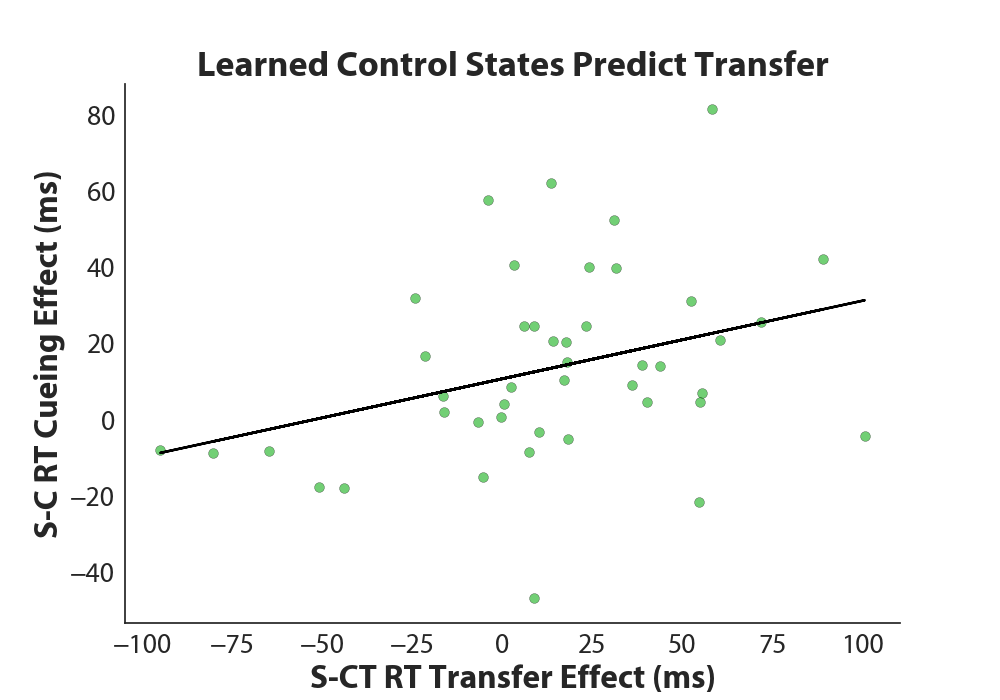

LinregressResult(slope=0.20452449702407796, intercept=10.730146520369313, rvalue=0.33913273913370734, pvalue=0.024322849054831647, stderr=0.087542693172627251)

In [48]:
from pylab import polyfit, poly1d
fig, ax = plt.subplots(figsize=(10, 7));
plt.scatter(SCTRTcueing.RT, SCRTcueing.RT, s=50,c=sns.xkcd_rgb['green'],alpha=0.6,edgecolors='k');
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);
fit = polyfit(SCTRTcueing.RT, SCRTcueing.RT, 1);
fit_fn = poly1d(fit);
plt.plot(SCTRTcueing.RT, fit_fn(SCTRTcueing.RT), 'k');
plt.title('Learned Control States Predict Transfer', fontsize=26,fontweight="bold");
plt.ylabel('S-C RT Cueing Effect (ms)', fontsize=24,fontweight="bold");
plt.xlabel('S-CT RT Transfer Effect (ms)', fontsize=24,fontweight="bold");
sns.despine();

plt.show()
stats.linregress(SCTRTcueing.RT,SCRTcueing.RT) #see stats below graph

#### Indeed, as the S-C RT cueing effect (high vs. low control-demand congruency effect) increased, so did the S-CT RT effect. We further divided these effects by mean RT in each phase, as a control for overall differences in RT, but this S-C/S-CT RT relationship was unaltered (see below).

In [49]:
SCTRTcueing_corr = SCTRTcueing.RT/overallSCTRT.RT;
SCRTcueing_corr = SCRTcueing.RT/overallSCRT.RT;

In [50]:
stats.linregress(SCTRTcueing_corr,SCRTcueing_corr)

LinregressResult(slope=0.20301743544280387, intercept=0.02057540798803598, rvalue=0.34165792155118513, pvalue=0.023217177968381065, stderr=0.086171549902528247)

<IPython.core.display.Javascript object>


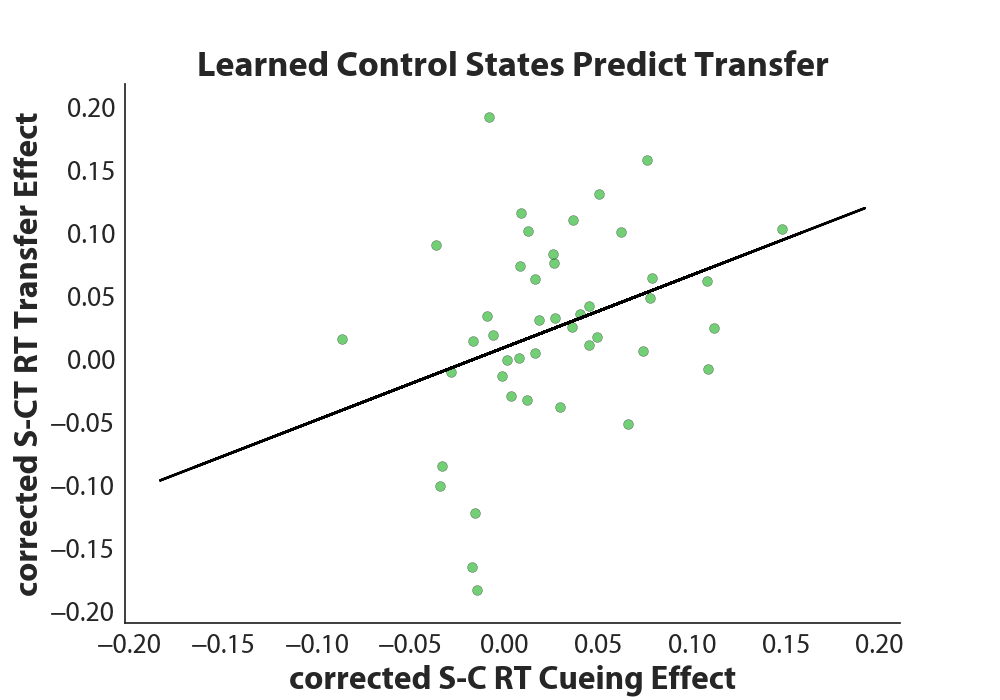

In [51]:
fig, ax = plt.subplots(figsize=(10, 7));
plt.scatter(SCRTcueing_corr,SCTRTcueing_corr, s=50,c=sns.xkcd_rgb['green'],alpha=0.6,edgecolors='k');
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);
fit = polyfit(SCRTcueing_corr,SCTRTcueing_corr, 1);
fit_fn = poly1d(fit);
plt.plot(SCTRTcueing_corr, fit_fn(SCTRTcueing_corr), 'k');
plt.title('Learned Control States Predict Transfer', fontsize=26,fontweight="bold");
plt.xlabel('corrected S-C RT Cueing Effect', fontsize=24,fontweight="bold");
plt.ylabel('corrected S-CT RT Transfer Effect', fontsize=24,fontweight="bold");
sns.despine();

plt.show()

This correlation does not exist for frequency-biased stimuli.

<IPython.core.display.Javascript object>


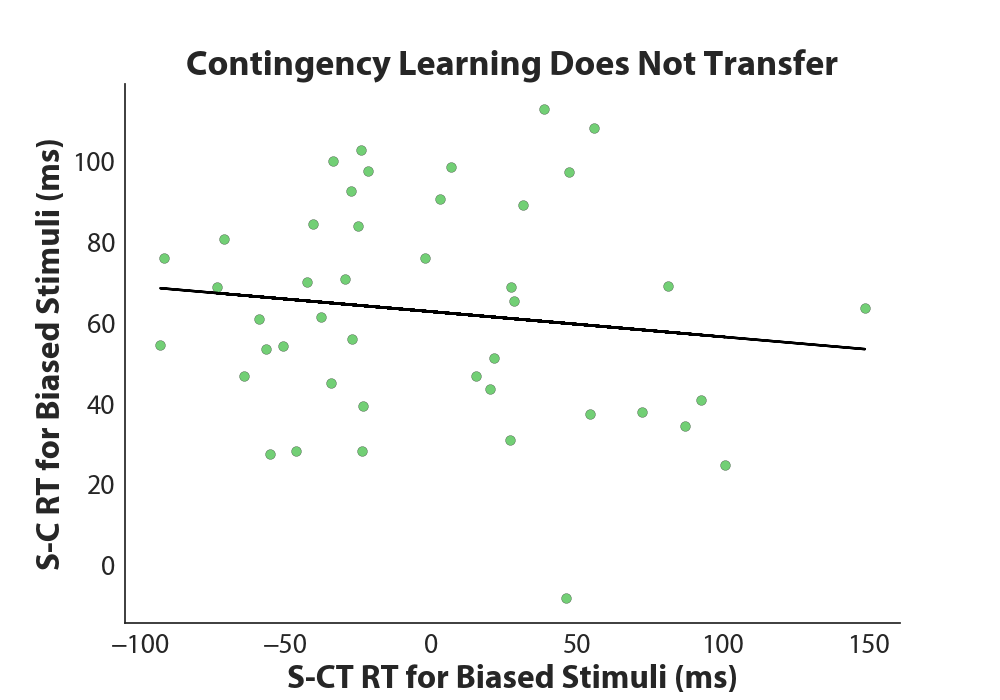

LinregressResult(slope=-0.062349984997596468, intercept=62.765852915677549, rvalue=-0.12973784037767538, pvalue=0.40126477837447461, stderr=0.073529046059235326)

In [52]:
from pylab import polyfit, poly1d
fig, ax = plt.subplots(figsize=(10, 7));
plt.scatter(SCTRTcueing_Bias.RT, SCRTcueing_Bias.RT, s=50,c=sns.xkcd_rgb['green'],alpha=0.6,edgecolors='k');
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);
fit = polyfit(SCTRTcueing_Bias.RT, SCRTcueing_Bias.RT, 1);
fit_fn = poly1d(fit);
plt.plot(SCTRTcueing_Bias.RT, fit_fn(SCTRTcueing_Bias.RT), 'k');
plt.title('Contingency Learning Does Not Transfer', fontsize=26,fontweight="bold");
plt.ylabel('S-C RT for Biased Stimuli (ms)', fontsize=24,fontweight="bold");
plt.xlabel('S-CT RT for Biased Stimuli (ms)', fontsize=24,fontweight="bold");
sns.despine();

plt.show()
stats.linregress(SCTRTcueing_Bias.RT,SCRTcueing_Bias.RT) #see stats below graph

Even correcting for overall differences in RT... still does not correlate for biased stimuli.

In [53]:
SCTRTcueing_corr_B = SCTRTcueing_Bias.RT/overallSCTRT.RT;
SCRTcueing_corr_B = SCRTcueing_Bias.RT/overallSCRT.RT;
stats.linregress(SCTRTcueing_corr_B,SCRTcueing_corr_B)

LinregressResult(slope=-0.077462827121711056, intercept=0.11889173389667204, rvalue=-0.15450995707620349, pvalue=0.31661995156579881, stderr=0.076430256348254969)

Now, we have to look specifically at SC learners vs. nonlearners. Do they show a difference in transfer, as implied by these correlations?

First I will make the appropriate CSVs for the R analysis.

In [54]:
#SC Learners
subjects = [1,2,4,5,6,7,8,9,10,11,12,13,14,15,18,19,21,22,23,24,25,26,28,29,33,34,35,36,37,38,39,40,41,42,43,45,46,47,48,49,51,52,53,54]
RTrunanalysis_SC = pd.DataFrame()

for subID in range(0,44):
    if SCRTcueing.RT[subID] > 0:
        sub = cdat[cdat.subject == subjects[subID]]
        SCrunRTs = sub.loc[sub['FreqBias'] == 'FreqUnbiased'].groupby(['subject', 'RunCounter','TransferProbe','TrialType'])['RT'].mean().reset_index()
        RTrunanalysis_SC = RTrunanalysis_SC.append(SCrunRTs)

In [55]:
#SC Nonlearners

subjects = [1,2,4,5,6,7,8,9,10,11,12,13,14,15,18,19,21,22,23,24,25,26,28,29,33,34,35,36,37,38,39,40,41,42,43,45,46,47,48,49,51,52,53,54]
RTrunanalysis_SC_Nonleaners = pd.DataFrame()

for subID in range(0,44):
    if SCRTcueing.RT[subID] < 0:
        sub = cdat[cdat.subject == subjects[subID]]
        SCrunRTs = sub.loc[sub['FreqBias'] == 'FreqUnbiased'].groupby(['subject', 'RunCounter','TransferProbe','TrialType'])['RT'].mean().reset_index()
        RTrunanalysis_SC_Nonleaners = RTrunanalysis_SC_Nonleaners.append(SCrunRTs)

In [56]:
#SC Learners

subjects = [1,2,4,5,6,7,8,9,10,11,12,13,14,15,18,19,21,22,23,24,25,26,28,29,33,34,35,36,37,38,39,40,41,42,43,45,46,47,48,49,51,52,53,54]
Run1_RTanalysis_SC = pd.DataFrame()
run1RT = cdat[cdat.RunCounter < 1]

Run2_RTanalysis_SC = pd.DataFrame()
run2RT = cdat[cdat.RunCounter == 1]

for subID in range(0,44):
    if SCRTcueing.RT[subID] > 0:
        sub = run1RT[run1RT.subject == subjects[subID]]
        SCrun1RTs = sub.loc[sub['FreqBias'] == 'FreqUnbiased'].groupby(['subject', 'TransferProbe','TrialType'])['RT'].mean().reset_index()
        Run1_RTanalysis_SC = Run1_RTanalysis_SC.append(SCrun1RTs)
        
        sub_r2 = run2RT[run2RT.subject == subjects[subID]]
        SCrun2RTs = sub_r2.loc[sub_r2['FreqBias'] == 'FreqUnbiased'].groupby(['subject', 'TransferProbe','TrialType'])['RT'].mean().reset_index()
        Run2_RTanalysis_SC = Run2_RTanalysis_SC.append(SCrun2RTs)

In [57]:
#SC Nonlearners

subjects = [1,2,4,5,6,7,8,9,10,11,12,13,14,15,18,19,21,22,23,24,25,26,28,29,33,34,35,36,37,38,39,40,41,42,43,45,46,47,48,49,51,52,53,54]
Run1_RTanalysis_SC_Nonlearners = pd.DataFrame()
run1RT = cdat[cdat.RunCounter < 1]

Run2_RTanalysis_SC_Nonlearners = pd.DataFrame()
run2RT = cdat[cdat.RunCounter == 1]

for subID in range(0,44):
    if SCRTcueing.RT[subID] < 0:
        sub = run1RT[run1RT.subject == subjects[subID]]
        SCrun1RTs = sub.loc[sub['FreqBias'] == 'FreqUnbiased'].groupby(['subject', 'TransferProbe','TrialType'])['RT'].mean().reset_index()
        Run1_RTanalysis_SC_Nonlearners = Run1_RTanalysis_SC_Nonlearners.append(SCrun1RTs)
        
        sub_r2 = run2RT[run2RT.subject == subjects[subID]]
        SCrun2RTs = sub_r2.loc[sub_r2['FreqBias'] == 'FreqUnbiased'].groupby(['subject', 'TransferProbe','TrialType'])['RT'].mean().reset_index()
        Run2_RTanalysis_SC_Nonlearners = Run2_RTanalysis_SC_Nonlearners.append(SCrun2RTs)

In [58]:
RTrunanalysis_SC.to_csv('SCT_RT_ANOVA_SCLearners_RunIncluded.csv')
Run1_RTanalysis_SC.to_csv('SCT_RT_ANOVA_SCLearners_RunOne.csv')
Run2_RTanalysis_SC.to_csv('SCT_RT_ANOVA_SCLearners_RunTwo.csv')

RTrunanalysis_SC_Nonleaners.to_csv('SCT_RT_ANOVA_SCNonLearners_RunIncluded.csv')
Run1_RTanalysis_SC_Nonlearners.to_csv('SCT_RT_ANOVA_SCNonLearners_RunOne.csv')
Run2_RTanalysis_SC_Nonlearners.to_csv('SCT_RT_ANOVA_SCNonLearners_RunTwo.csv')

#### Stats for Learners below

In [59]:
%%writefile SCTAnova_SC.R

rawRTData <- read.csv('SCT_RT_ANOVA_SCLearners_RunIncluded.csv')
install.packages("psych",repos='https://mirrors.nics.utk.edu/cran/')
install.packages("ez",repos='https://mirrors.nics.utk.edu/cran/')
library(psych)
library(ez)

rawRTData$subject = as.factor(rawRTData$subject)
rawRTData$RunCounter = as.factor(rawRTData$RunCounter)
rawRTData$TransferProbe = as.factor(rawRTData$TransferProbe)
rawRTData$TrialType = as.factor(rawRTData$TrialType)

SCT_RT_runANOVA <- ezANOVA(data=as.data.frame(rawRTData),
                                  dv=RT,
                                  wid=subject,
                                  within=.(RunCounter, TransferProbe, TrialType),
                                  detailed=TRUE)
print(SCT_RT_runANOVA)

rawRTData_R1 <- read.csv('SCT_RT_ANOVA_SCLearners_RunOne.csv')

rawRTData_R1$subject = as.factor(rawRTData_R1$subject)
rawRTData_R1$TransferProbe = as.factor(rawRTData_R1$TransferProbe)
rawRTData_R1$TrialType = as.factor(rawRTData_R1$TrialType)

SCT_RT_runANOVA_R1 <- ezANOVA(data=as.data.frame(rawRTData_R1),
                                  dv=RT,
                                  wid=subject,
                                  within=.(TransferProbe, TrialType),
                                  detailed=TRUE)
print(SCT_RT_runANOVA_R1)

rawRTData_R2 <- read.csv('SCT_RT_ANOVA_SCLearners_RunTwo.csv')

rawRTData_R2$subject = as.factor(rawRTData_R2$subject)
rawRTData_R2$TransferProbe = as.factor(rawRTData_R2$TransferProbe)
rawRTData_R2$TrialType = as.factor(rawRTData_R2$TrialType)

SCT_RT_runANOVA_R2 <- ezANOVA(data=as.data.frame(rawRTData_R2),
                                  dv=RT,
                                  wid=subject,
                                  within=.(TransferProbe, TrialType),
                                  detailed=TRUE)
print(SCT_RT_runANOVA_R2)

Overwriting SCTAnova_SC.R


In [60]:
! Rscript SCTAnova_SC.R

package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cb383\AppData\Local\Temp\Rtmp2F9q33\downloaded_packages
package 'ez' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cb383\AppData\Local\Temp\Rtmp2F9q33\downloaded_packages
$ANOVA
                              Effect DFn DFd          SSn        SSd
1                        (Intercept)   1  30 6.798042e+07 275720.333
2                         RunCounter   1  30 5.009938e+02  21117.559
3                      TransferProbe   1  30 7.255126e+02  24550.667
4                          TrialType   1  30 4.137098e+05  54023.144
5           RunCounter:TransferProbe   1  30 3.125964e+03  20006.800
6               RunCounter:TrialType   1  30 1.223341e+02  22064.583
7            TransferProbe:TrialType   1  30 1.864244e+03  11831.287
8 RunCounter:TransferProbe:TrialType   1  30 2.438105e+03   9651.923
             F            p p<.05          ges


Installing package into 'C:/Users/cb383/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
trying URL 'https://mirrors.nics.utk.edu/cran/bin/windows/contrib/3.4/psych_1.7.8.zip'
Content type 'application/zip' length 5342301 bytes (5.1 MB)
downloaded 5.1 MB

Installing package into 'C:/Users/cb383/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
trying URL 'https://mirrors.nics.utk.edu/cran/bin/windows/contrib/3.4/ez_4.4-0.zip'
Content type 'application/zip' length 332238 bytes (324 KB)
downloaded 324 KB

Warning message:
package 'psych' was built under R version 3.4.3 
Warning message:
package 'ez' was built under R version 3.4.3 


#### Stats for Nonlearners below

In [61]:
%%writefile SCTAnova_SC_NonLearners.R

rawRTData <- read.csv('SCT_RT_ANOVA_SCNonLearners_RunIncluded.csv')
install.packages("psych",repos='https://mirrors.nics.utk.edu/cran/')
install.packages("ez",repos='https://mirrors.nics.utk.edu/cran/')
library(psych)
library(ez)

rawRTData$subject = as.factor(rawRTData$subject)
rawRTData$RunCounter = as.factor(rawRTData$RunCounter)
rawRTData$TransferProbe = as.factor(rawRTData$TransferProbe)
rawRTData$TrialType = as.factor(rawRTData$TrialType)

SCT_RT_runANOVA <- ezANOVA(data=as.data.frame(rawRTData),
                                  dv=RT,
                                  wid=subject,
                                  within=.(RunCounter, TransferProbe, TrialType),
                                  detailed=TRUE)
print(SCT_RT_runANOVA)

rawRTData_R1 <- read.csv('SCT_RT_ANOVA_SCNonLearners_RunOne.csv')

rawRTData_R1$subject = as.factor(rawRTData_R1$subject)
rawRTData_R1$TransferProbe = as.factor(rawRTData_R1$TransferProbe)
rawRTData_R1$TrialType = as.factor(rawRTData_R1$TrialType)

SCT_RT_runANOVA_R1 <- ezANOVA(data=as.data.frame(rawRTData_R1),
                                  dv=RT,
                                  wid=subject,
                                  within=.(TransferProbe, TrialType),
                                  detailed=TRUE)
print(SCT_RT_runANOVA_R1)

rawRTData_R2 <- read.csv('SCT_RT_ANOVA_SCNonLearners_RunTwo.csv')

rawRTData_R2$subject = as.factor(rawRTData_R2$subject)
rawRTData_R2$TransferProbe = as.factor(rawRTData_R2$TransferProbe)
rawRTData_R2$TrialType = as.factor(rawRTData_R2$TrialType)

SCT_RT_runANOVA_R2 <- ezANOVA(data=as.data.frame(rawRTData_R2),
                                  dv=RT,
                                  wid=subject,
                                  within=.(TransferProbe, TrialType),
                                  detailed=TRUE)
print(SCT_RT_runANOVA_R2)

Overwriting SCTAnova_SC_NonLearners.R


In [62]:
! Rscript SCTAnova_SC_NonLearners.R

package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cb383\AppData\Local\Temp\RtmpQfq05p\downloaded_packages
package 'ez' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cb383\AppData\Local\Temp\RtmpQfq05p\downloaded_packages
$ANOVA
                              Effect DFn DFd          SSn       SSd
1                        (Intercept)   1  12 2.654352e+07 85748.845
2                         RunCounter   1  12 1.905259e+02 17105.360
3                      TransferProbe   1  12 1.531937e+02 12215.941
4                          TrialType   1  12 1.418426e+05 12653.913
5           RunCounter:TransferProbe   1  12 1.825146e+02 15617.792
6               RunCounter:TrialType   1  12 3.912862e+01  7393.825
7            TransferProbe:TrialType   1  12 1.576357e+03  3406.641
8 RunCounter:TransferProbe:TrialType   1  12 1.145758e+02 10209.724
             F            p p<.05          ges
1 3.71459

Installing package into 'C:/Users/cb383/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
trying URL 'https://mirrors.nics.utk.edu/cran/bin/windows/contrib/3.4/psych_1.7.8.zip'
Content type 'application/zip' length 5342301 bytes (5.1 MB)
downloaded 5.1 MB

Installing package into 'C:/Users/cb383/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
trying URL 'https://mirrors.nics.utk.edu/cran/bin/windows/contrib/3.4/ez_4.4-0.zip'
Content type 'application/zip' length 332238 bytes (324 KB)
downloaded 324 KB

Warning message:
package 'psych' was built under R version 3.4.3 
Warning message:
package 'ez' was built under R version 3.4.3 


Confirming the individual differences in transfer learning we observed in Experiment 1, we also found that RT transfer was stronger in S-C learners (run x cue x congruency: F(1,30) = 7.58, p = 0.010, ηp2 = 0.20; run 1 cue x congruency: F(1,30) = 21.14, p < 0.001, ηp2 = 0.41; run 2 cue x congruency: F < 1) than S-C non-learners (run x cue x congruency: F < 1; run 1 cue x congruency: F < 1; run 2 cue x congruency: F(1,12) = 3.37, p = 0.091, ηp2 = 0.22).

# Look at the Results Graphically

Note that the graphs generated mimic the paper, but I used Matlab to generate the figures, because I like their graphics more.

In [63]:
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);

<IPython.core.display.Javascript object>


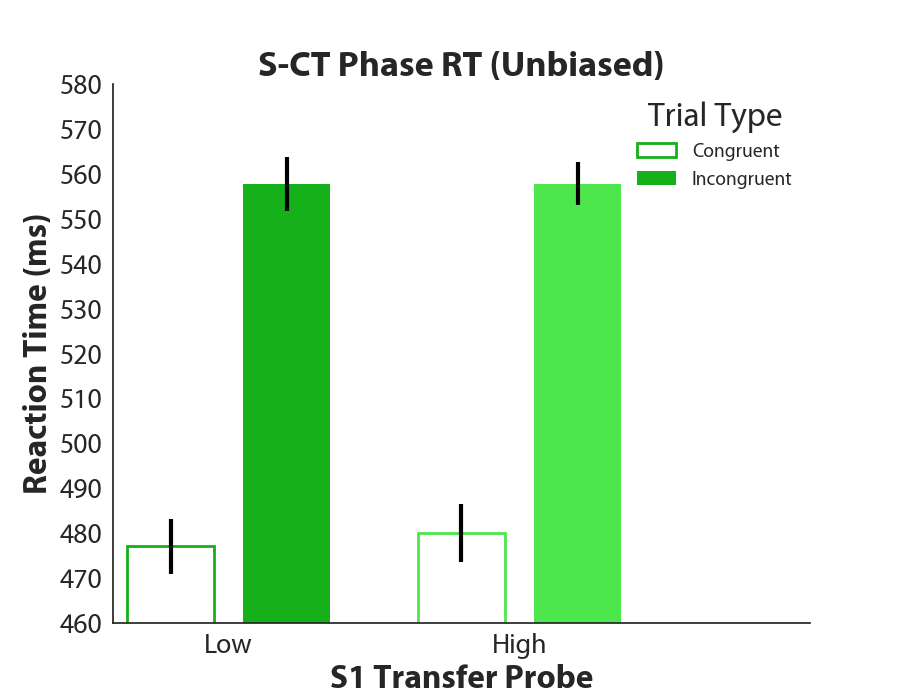

In [64]:
barwidth = 0.75; 
fig, ax = plt.subplots(figsize=(9, 7));
rects1 = ax.bar(0.5,RTanalysis_unbias.LowC.mean(),barwidth,yerr=RTstderror.LowC,ecolor='k',edgecolor=sns.xkcd_rgb['green'],linewidth = 2, facecolor='none',error_kw=dict(lw=3),label='Congruent');
rects2 = ax.bar(1.5,RTanalysis_unbias.LowIC.mean(),barwidth,color=sns.xkcd_rgb['green'],yerr=RTstderror.LowIC,ecolor='k',error_kw=dict(lw=3),label='Incongruent');
rects3 = ax.bar(3,RTanalysis_unbias.HighC.mean(),barwidth,yerr=RTstderror.HighC,ecolor='k',edgecolor=(0.3,0.9,0.3),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects4 = ax.bar(4,RTanalysis_unbias.HighIC.mean(),barwidth,color=(0.3,0.9,0.3),yerr=RTstderror.HighIC,ecolor='k',error_kw=dict(lw=3));
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);
ax.set_ylim(460,580);
ax.set_xlim(0,6);
ax.set_xticklabels(('Low', 'High'));
ax.set_xticks([1, 3.5]);
ax.set_yticks(np.arange(460, 581, 10));
plt.legend([rects1,rects2], ['Congruent','Incongruent'], loc='upper right',fontsize=18,title='Trial Type');
plt.legend(title='Trial Type',fontsize=14);
plt.title('S-CT Phase RT (Unbiased)', fontsize=26,fontweight="bold");
plt.ylabel('Reaction Time (ms)', fontsize=24,fontweight="bold");
plt.xlabel('S1 Transfer Probe', fontsize=24,fontweight="bold");
sns.despine();

plt.show()

<IPython.core.display.Javascript object>


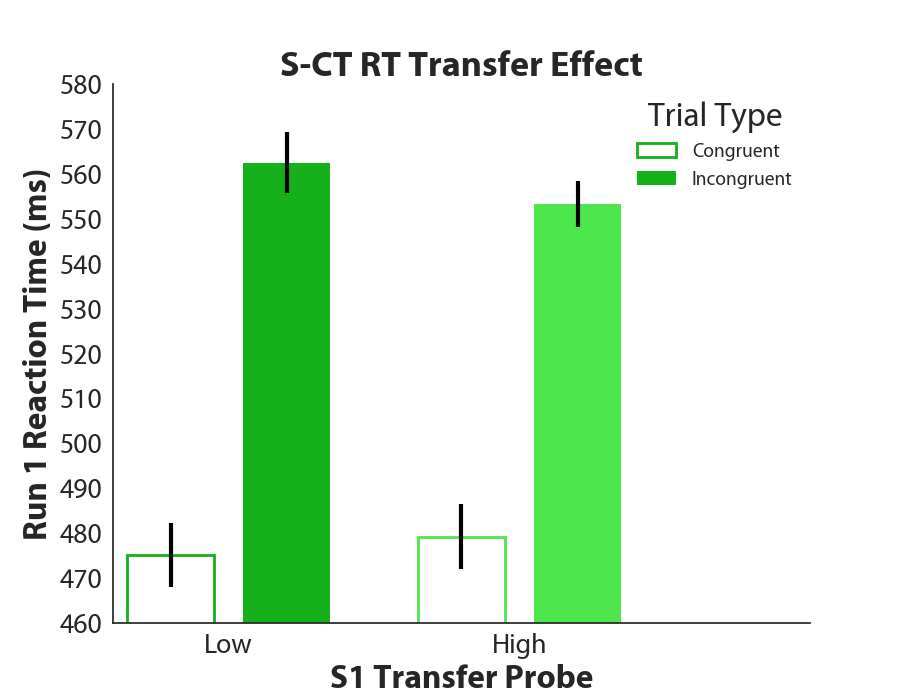

In [65]:
barwidth = 0.75; 
fig, ax = plt.subplots(figsize=(9, 7));
rects1 = ax.bar(0.5,Run1OnlyRT_unbias.LowC.mean(),barwidth,yerr=RTstderror_Run1.LowC,ecolor='k',edgecolor=sns.xkcd_rgb['green'],linewidth = 2, facecolor='none',error_kw=dict(lw=3),label='Congruent');
rects2 = ax.bar(1.5,Run1OnlyRT_unbias.LowIC.mean(),barwidth,color=sns.xkcd_rgb['green'],yerr=RTstderror_Run1.LowIC,ecolor='k',error_kw=dict(lw=3),label='Incongruent');
rects3 = ax.bar(3,Run1OnlyRT_unbias.HighC.mean(),barwidth,yerr=RTstderror_Run1.HighC,ecolor='k',edgecolor=(0.3,0.9,0.3),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects4 = ax.bar(4,Run1OnlyRT_unbias.HighIC.mean(),barwidth,color=(0.3,0.9,0.3),yerr=RTstderror_Run1.HighIC,ecolor='k',error_kw=dict(lw=3));
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);
ax.set_ylim(460,580);
ax.set_xlim(0,6);
ax.set_xticklabels(('Low', 'High'));
ax.set_xticks([1, 3.5]);
ax.set_yticks(np.arange(460, 581, 10));
plt.legend([rects1,rects2], ['Congruent','Incongruent'], loc='upper right',fontsize=18,title='Trial Type');
plt.legend(title='Trial Type',fontsize=14);
plt.title('S-CT RT Transfer Effect', fontsize=26,fontweight="bold");
plt.ylabel('Run 1 Reaction Time (ms)', fontsize=24,fontweight="bold");
plt.xlabel('S1 Transfer Probe', fontsize=24,fontweight="bold");
sns.despine();

plt.show()

<IPython.core.display.Javascript object>


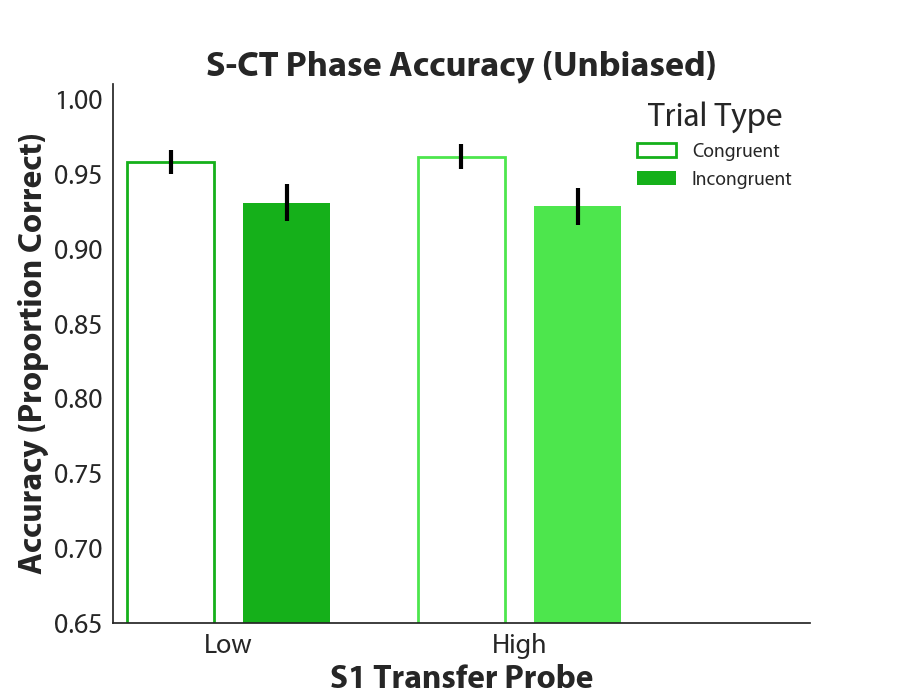

In [66]:
barwidth = 0.75; 
fig, ax = plt.subplots(figsize=(9, 7));
rects1 = ax.bar(0.5,ACCanalysis_unbias.LowC.mean(),barwidth,yerr=ACCstderror.LowC,ecolor='k',edgecolor=sns.xkcd_rgb['green'],linewidth = 2, facecolor='none',error_kw=dict(lw=3),label='Congruent');
rects2 = ax.bar(1.5,ACCanalysis_unbias.LowIC.mean(),barwidth,color=sns.xkcd_rgb['green'],yerr=ACCstderror.LowIC,ecolor='k',error_kw=dict(lw=3),label='Incongruent');
rects3 = ax.bar(3,ACCanalysis_unbias.HighC.mean(),barwidth,yerr=ACCstderror.HighC,ecolor='k',edgecolor=(0.3,0.9,0.3),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects4 = ax.bar(4,ACCanalysis_unbias.HighIC.mean(),barwidth,color=(0.3,0.9,0.3),yerr=ACCstderror.HighIC,ecolor='k',error_kw=dict(lw=3));
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);
ax.set_ylim(0.65,1.01);
ax.set_xlim(0,6);
ax.set_xticklabels(('Low', 'High'));
ax.set_xticks([1, 3.5]);
ax.set_yticks(np.arange(0.65, 1.01, 0.05));
plt.legend([rects1,rects2], ['Congruent','Incongruent'], loc='upper right',fontsize=18,title='Trial Type')
plt.legend(title='Trial Type',fontsize=14)
plt.title('S-CT Phase Accuracy (Unbiased)', fontsize=26,fontweight="bold")
plt.ylabel('Accuracy (Proportion Correct)', fontsize=24,fontweight="bold")
plt.xlabel('S1 Transfer Probe', fontsize=24,fontweight="bold")
sns.despine();

plt.show()

<IPython.core.display.Javascript object>


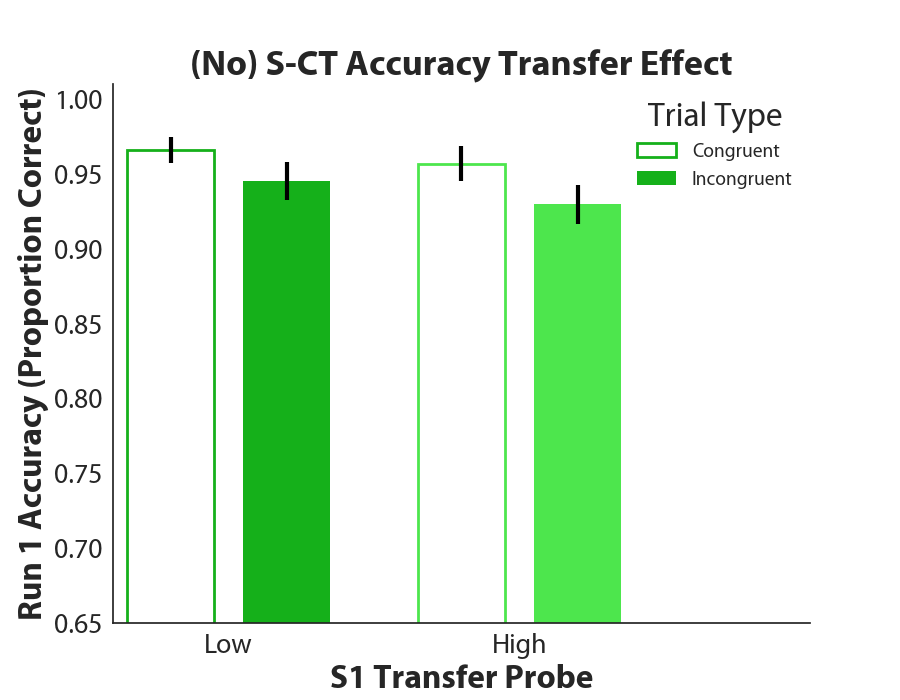

In [67]:
barwidth = 0.75; 
fig, ax = plt.subplots(figsize=(9, 7));
rects1 = ax.bar(0.5,Run1OnlyACC_unbias.LowC.mean(),barwidth,yerr=ACCstderror_Run1.LowC,ecolor='k',edgecolor=sns.xkcd_rgb['green'],linewidth = 2, facecolor='none',error_kw=dict(lw=3),label='Congruent');
rects2 = ax.bar(1.5,Run1OnlyACC_unbias.LowIC.mean(),barwidth,color=sns.xkcd_rgb['green'],yerr=ACCstderror_Run1.LowIC,ecolor='k',error_kw=dict(lw=3),label='Incongruent');
rects3 = ax.bar(3,Run1OnlyACC_unbias.HighC.mean(),barwidth,yerr=ACCstderror_Run1.HighC,ecolor='k',edgecolor=(0.3,0.9,0.3),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects4 = ax.bar(4,Run1OnlyACC_unbias.HighIC.mean(),barwidth,color=(0.3,0.9,0.3),yerr=ACCstderror_Run1.HighIC,ecolor='k',error_kw=dict(lw=3));
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);
ax.set_ylim(0.65,1.01);
ax.set_xlim(0,6);
ax.set_xticklabels(('Low', 'High'));
ax.set_xticks([1, 3.5]);
ax.set_yticks(np.arange(0.65, 1.01, 0.05));
plt.legend([rects1,rects2], ['Congruent','Incongruent'], loc='upper right',fontsize=18,title='Trial Type');
plt.legend(title='Trial Type',fontsize=14);
plt.title('(No) S-CT Accuracy Transfer Effect', fontsize=26,fontweight="bold");
plt.ylabel('Run 1 Accuracy (Proportion Correct)', fontsize=24,fontweight="bold");
plt.xlabel('S1 Transfer Probe', fontsize=24,fontweight="bold");
sns.despine();

plt.show()

# Making 95% Confidence Intervals

Now I'm making the Supplementary tables that show our data in full, with 95% CIs accompanying the means.

In [68]:
import statsmodels.stats.api as sms

a = RTanalysis_unbias.LowC.mean()
sms.DescrStatsW(RTanalysis_unbias.LowC).tconfint_mean()
#a

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(464.87172041353301, 489.20967480803256)

In [69]:
a = RTanalysis_unbias.LowIC.mean()
sms.DescrStatsW(RTanalysis_unbias.LowIC).tconfint_mean()
#a

(545.79081828068649, 569.75732225481863)

In [70]:
a = RTanalysis_unbias.HighC.mean()
sms.DescrStatsW(RTanalysis_unbias.HighC).tconfint_mean()
#a

(467.04833002937522, 493.02935152754395)

In [71]:
a = RTanalysis_unbias.HighIC.mean()
sms.DescrStatsW(RTanalysis_unbias.HighIC).tconfint_mean()
#a

(548.34176946068351, 567.35383943678289)

now for the biased stimuli

In [72]:
a = RTanalysis_Bias.LowC.mean()
sms.DescrStatsW(RTanalysis_Bias.LowC).tconfint_mean()
#a

(505.12905904965083, 528.79736784303009)

In [73]:
a = RTanalysis_Bias.LowIC.mean()
sms.DescrStatsW(RTanalysis_Bias.LowIC).tconfint_mean()
#a

(563.88222232873477, 585.62508234199868)

In [74]:
a = RTanalysis_Bias.HighC.mean()
sms.DescrStatsW(RTanalysis_Bias.HighC).tconfint_mean()
#a

(508.05012476406603, 532.15509950727676)

In [75]:
a = RTanalysis_Bias.HighIC.mean()
sms.DescrStatsW(RTanalysis_Bias.HighIC).tconfint_mean()
#a

(565.69681791156052, 588.76357906590317)

now for runs 1 and 2 of the unbiased stimuli

In [76]:
a = Run1OnlyRT_unbias.LowC.mean()
sms.DescrStatsW(Run1OnlyRT_unbias.LowC).tconfint_mean()
#a

(460.78778054006705, 489.4779481756616)

In [77]:
a = Run1OnlyRT_unbias.LowIC.mean()
sms.DescrStatsW(Run1OnlyRT_unbias.LowIC).tconfint_mean()
#a

(548.66813671173134, 576.25361653502193)

In [78]:
a = Run1OnlyRT_unbias.HighC.mean()
sms.DescrStatsW(Run1OnlyRT_unbias.HighC).tconfint_mean()
#a

(464.55647129002006, 493.85765208660331)

In [79]:
a = Run1OnlyRT_unbias.HighIC.mean()
sms.DescrStatsW(Run1OnlyRT_unbias.HighIC).tconfint_mean()
#a

(543.08765152218518, 563.5778066307729)

In [80]:
a = Run2OnlyRT_unbias.LowC.mean()
sms.DescrStatsW(Run2OnlyRT_unbias.LowC).tconfint_mean()
#a

(465.54236280516773, 491.47044383263892)

In [81]:
a = Run2OnlyRT_unbias.LowIC.mean()
sms.DescrStatsW(Run2OnlyRT_unbias.LowIC).tconfint_mean()
#a

(540.13691584727349, 565.96999252213482)

In [82]:
a = Run2OnlyRT_unbias.HighC.mean()
sms.DescrStatsW(Run2OnlyRT_unbias.HighC).tconfint_mean()
#a

(467.21412725134661, 494.67322844850895)

In [83]:
a = Run2OnlyRT_unbias.HighIC.mean()
sms.DescrStatsW(Run2OnlyRT_unbias.HighIC).tconfint_mean()
#a

(551.15914312213897, 573.72455096155511)

now for runs 1 and 2 of the biased stimuli

In [84]:
a = Run1OnlyRT_bias.LowC.mean()
sms.DescrStatsW(Run1OnlyRT_bias.LowC).tconfint_mean()
#a

(503.62466439044448, 530.14535725457711)

In [85]:
a = Run1OnlyRT_bias.LowIC.mean()
sms.DescrStatsW(Run1OnlyRT_bias.LowIC).tconfint_mean()
#a

(567.71964984023657, 594.26730903422231)

In [86]:
a = Run1OnlyRT_bias.HighC.mean()
sms.DescrStatsW(Run1OnlyRT_bias.HighC).tconfint_mean()
#a

(502.45035696194503, 530.67168488509685)

In [87]:
a = Run1OnlyRT_bias.HighIC.mean()
sms.DescrStatsW(Run1OnlyRT_bias.HighIC).tconfint_mean()
#a

(569.67247417562817, 593.92602871037479)

In [88]:
a = Run2OnlyRT_bias.LowC.mean()
sms.DescrStatsW(Run2OnlyRT_bias.LowC).tconfint_mean()
#a

(502.77456280951424, 530.32734916739764)

In [89]:
a = Run2OnlyRT_bias.LowIC.mean()
sms.DescrStatsW(Run2OnlyRT_bias.LowIC).tconfint_mean()
#a

(558.70541974880268, 582.16943595105306)

In [90]:
a = Run2OnlyRT_bias.HighC.mean()
sms.DescrStatsW(Run2OnlyRT_bias.HighC).tconfint_mean()
#a

(508.68030364087087, 536.2899344543672)

In [91]:
a = Run2OnlyRT_bias.HighIC.mean()
sms.DescrStatsW(Run2OnlyRT_bias.HighIC).tconfint_mean()
#a

(558.57367429758438, 586.27693897802897)

And for Accuracy...

In [92]:
a = ACCanalysis_unbias.LowC.mean()
sms.DescrStatsW(ACCanalysis_unbias.LowC).tconfint_mean()
#a

(0.94158110368363712, 0.97432798722545344)

In [93]:
a = ACCanalysis_unbias.LowIC.mean()
sms.DescrStatsW(ACCanalysis_unbias.LowIC).tconfint_mean()
#a

(0.9058834870511957, 0.95548014931244085)

In [94]:
a = ACCanalysis_unbias.HighC.mean()
sms.DescrStatsW(ACCanalysis_unbias.HighC).tconfint_mean()
#a

(0.94469082462983689, 0.97803644809743573)

In [95]:
a = ACCanalysis_unbias.HighIC.mean()
sms.DescrStatsW(ACCanalysis_unbias.HighIC).tconfint_mean()
#a

(0.90367843402312775, 0.95290051334529335)

now for the biased stimuli

In [96]:
a = ACCanalysis_Bias.LowC.mean()
sms.DescrStatsW(ACCanalysis_Bias.LowC).tconfint_mean()
#a

(0.85454656334837742, 0.91590798210616786)

In [97]:
a = ACCanalysis_Bias.LowIC.mean()
sms.DescrStatsW(ACCanalysis_Bias.LowIC).tconfint_mean()
#a

(0.82862389180182616, 0.90092156274362833)

In [98]:
a = ACCanalysis_Bias.HighC.mean()
sms.DescrStatsW(ACCanalysis_Bias.HighC).tconfint_mean()
#a

(0.88151040132952307, 0.93212596230684042)

In [99]:
a = ACCanalysis_Bias.HighIC.mean()
sms.DescrStatsW(ACCanalysis_Bias.HighIC).tconfint_mean()
#a

(0.83589668500855585, 0.89364876953689865)

now for runs 1 and 2 of the unbiased stimuli

In [100]:
a = Run1OnlyACC_unbias.LowC.mean()
sms.DescrStatsW(Run1OnlyACC_unbias.LowC).tconfint_mean()
#a

(0.94863189259972447, 0.98318628921845741)

In [101]:
a = Run1OnlyACC_unbias.LowIC.mean()
sms.DescrStatsW(Run1OnlyACC_unbias.LowIC).tconfint_mean()
#a

(0.91967815111222129, 0.97123093979686959)

In [102]:
a = Run1OnlyACC_unbias.HighC.mean()
sms.DescrStatsW(Run1OnlyACC_unbias.HighC).tconfint_mean()
#a

(0.93281827168143061, 0.98081809195493275)

In [103]:
a = Run1OnlyACC_unbias.HighIC.mean()
sms.DescrStatsW(Run1OnlyACC_unbias.HighIC).tconfint_mean()
#a

(0.90366502736875409, 0.95542588172215526)

In [104]:
a = Run2OnlyACC_unbias.LowC.mean()
sms.DescrStatsW(Run2OnlyACC_unbias.LowC).tconfint_mean()
#a

(0.92418572702689283, 0.97581427297310708)

In [105]:
a = Run2OnlyACC_unbias.LowIC.mean()
sms.DescrStatsW(Run2OnlyACC_unbias.LowIC).tconfint_mean()
#a

(0.88450249458313934, 0.94731568723504245)

In [106]:
a = Run2OnlyACC_unbias.HighC.mean()
sms.DescrStatsW(Run2OnlyACC_unbias.HighC).tconfint_mean()
#a

(0.94421877603675219, 0.98759940578142968)

In [107]:
a = Run2OnlyACC_unbias.HighIC.mean()
sms.DescrStatsW(Run2OnlyACC_unbias.HighIC).tconfint_mean()
#a

(0.89174241964595735, 0.96280303489949715)

now for runs 1 and 2 of the biased stimuli

In [108]:
a = Run1OnlyACC_bias.LowC.mean()
sms.DescrStatsW(Run1OnlyACC_bias.LowC).tconfint_mean()
#a

(0.85192253315354238, 0.92080473957373032)

In [109]:
a = Run1OnlyACC_bias.LowIC.mean()
sms.DescrStatsW(Run1OnlyACC_bias.LowIC).tconfint_mean()
#a

(0.78818031348996365, 0.8890924137827636)

In [110]:
a = Run1OnlyACC_bias.HighC.mean()
sms.DescrStatsW(Run1OnlyACC_bias.HighC).tconfint_mean()
#a

(0.86852660701823903, 0.93601884752721565)

In [111]:
a = Run1OnlyACC_bias.HighIC.mean()
sms.DescrStatsW(Run1OnlyACC_bias.HighIC).tconfint_mean()
#a

(0.82195230223087434, 0.9098658795873078)

In [112]:
a = Run2OnlyACC_bias.LowC.mean()
sms.DescrStatsW(Run2OnlyACC_bias.LowC).tconfint_mean()
#a

(0.84645721757145653, 0.92172460061036199)

In [113]:
a = Run2OnlyACC_bias.LowIC.mean()
sms.DescrStatsW(Run2OnlyACC_bias.LowIC).tconfint_mean()
#a

(0.85221923667385457, 0.92959894514432739)

In [114]:
a = Run2OnlyACC_bias.HighC.mean()
sms.DescrStatsW(Run2OnlyACC_bias.HighC).tconfint_mean()
#a

(0.88116238958646165, 0.9415648831408111)

In [115]:
a = Run2OnlyACC_bias.HighIC.mean()
sms.DescrStatsW(Run2OnlyACC_bias.HighIC).tconfint_mean()
#a

(0.83145379949491705, 0.89581892777781025)